---
<div align="center">
<h1><span style="color:red;">Surfing the Bitcoin Waves: Comprehensive Trend Forecasting with Various Trader Types</span></h1>
</div>

---
# Authors:
<h3>
<ol>
  <li>Can Ali Ateş - Hacettepe University, Turkey</li>
  <li>Emre Çoban - Hacettepe University, Turkey</li>
</ol>   
</h3>

---
# Problem Definition:
<b></b>
<div style="font-size: 18px;">
    <p>The goal of this project is to thoroughly analyze trends in Bitcoin by studying the behaviors of three key groups:</p>
    <ol>
        <li>Large holders of cryptocurrency (referred to as "whales")</li>
        <li>Influential participants in the stock market (widely recognized as “top traders”)</li>
        <li>Automated trading algorithms (commonly known as "bots")</li>
    </ol>
</div>

---
# Table of Contents

## 1. [Dataset](#1)
    
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>1.1. [Data Explanation](#1.1)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>1.2. [Data Visualization](#1.2)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>1.3. [Data Frame Creation](#1.3)
    
## 2. [Exploratory Data Analysis and Preprocessing](#2)

### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.1. [Get Insights](#2.1)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.2. [Handling Missing Values](#2.2)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.3. [Outlier Analysis](#2.3)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.4. [Feature Selection and Engineering](#2.4)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.5. [Splitting Data Into Train, Validation and Test](#2.5)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.6. [Scaling Data](#2.6)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.7. [Splitting Target and Input Feature](#2.7)

## 3. [Methodology](#3)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1. [Machine Learning Models](#3.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1.1 [Linear Regression Model](#3.1.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1.2 [Random Forest Regression Model](#3.1.2)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1.3 [XGBoost Regression Model](#3.1.3)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.2. [Traditional Forecasting Models](#3.2)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.2.1 [SARIMAX Model](#3.2.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.2.2 [Prophet Model](#3.2.2)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.3. [Deep Learning Models](#3.3)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.3.1 [LSTM-FCN Model](#3.3.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.3.2 [FCN Model](#3.3.2)

In [37]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Methodology
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model


# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

<a id=1></a>
# 1. Dataset

<a id=1.1></a>
## 1.1 Data Explanation

The dataset is a combination of 8 different CSV files.

1. **klines:** The dataset has “Open”, “Close”, “High” and “Low” price features for the Bitcoin stock market.
2. **botTracker:** The dataset has an “estimatedBotCount” feature which indicates the prediction of bot activity based on the searching for frequently occurring unique order sizes.
3. **binanceGlobalAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of accounts that are long or short strategy on Binance.
4. **binanceTopTraderAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top trader accounts (top %20) that are long or short strategies on Binance.
5. **binanceTopTraderPositions:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top traders positions (top %20) that are long or short strategy on Binance.
6. **binanceWhaleRetailDelta:** The dataset has a “WhaleRetailPositionDelta” feature that indicates the difference between the percentage of long positions held by top trader accounts ("whales") and the percentage of long positions held by global accounts ("retail").
7. **buyVolume:** The dataset has a “BuyingOrderQuantity” feature that indicates the quantity of buying orders executed during a specified period.
8. **sellVolume:** The dataset has a “SellingOrderQuantity” feature that indicates the quantity of selling orders executed during a specified period.

In [38]:
# Define the CSV files
data_files = ["klines", "botTracker", "binanceGlobalAccounts", "binanceTopTraderAccounts", 
              "binanceTopTraderPositions", "binanceWhaleDelta", "buyVolume", "sellVolume"]

<a id=1.2></a>
## 1.2 Data Visualization

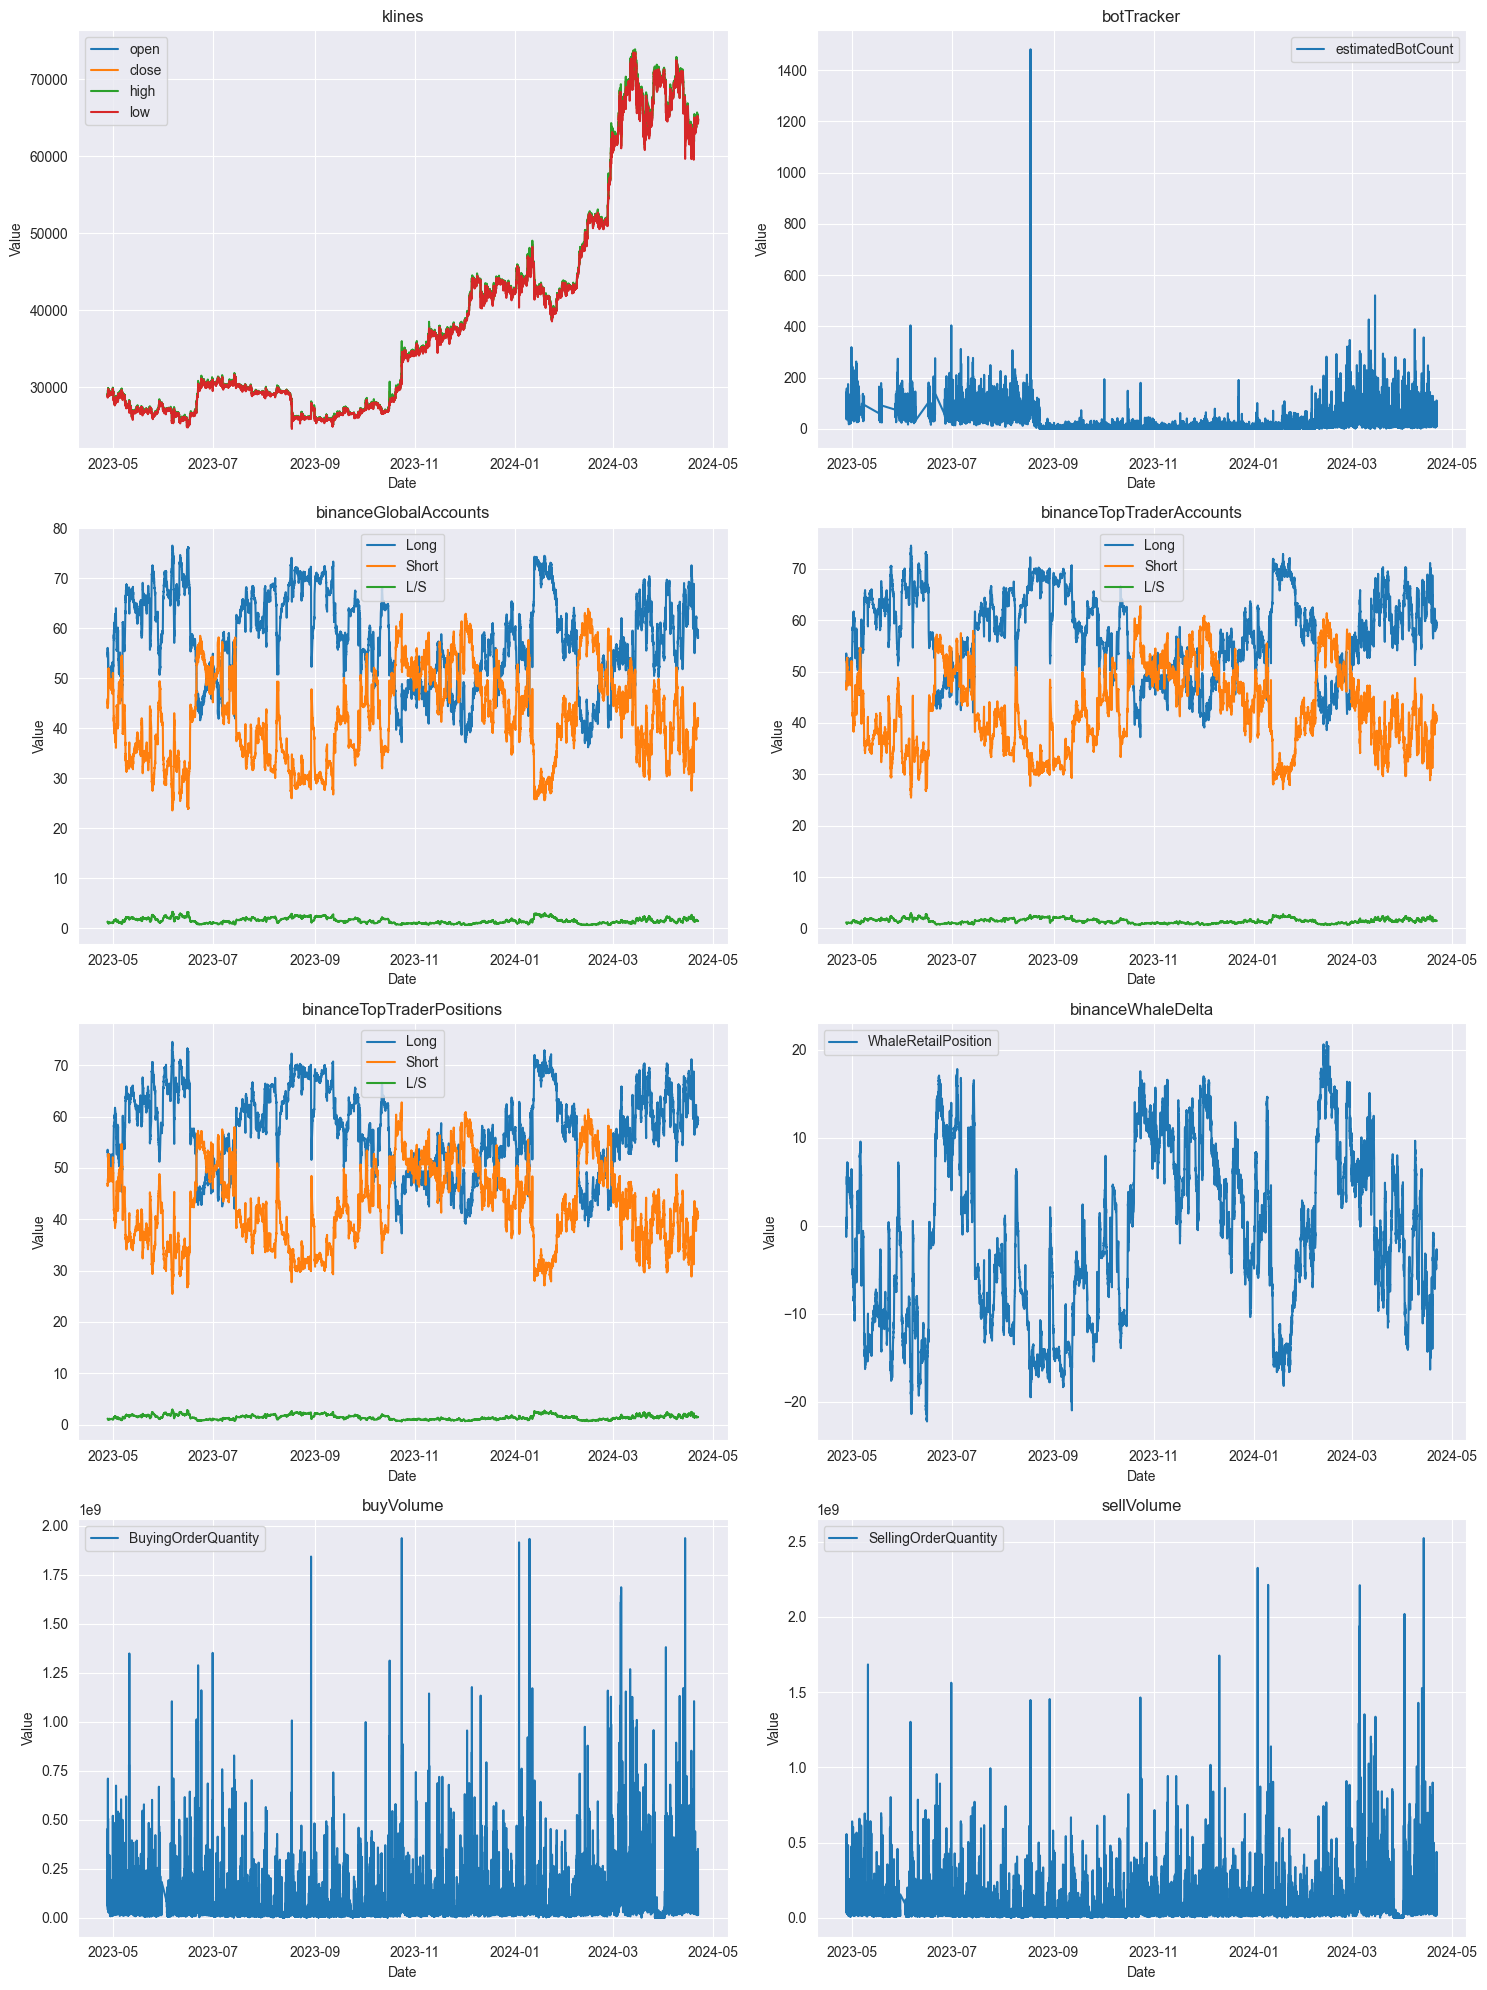

In [39]:
def plot_csv(filename:str, ax:plt.axes):
    # Read the CSV file
    data = pd.read_csv(f"data/{filename}15mins.csv")
    # Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    # Plot the data
    for column in data.columns[1:]:
        ax.plot(data['Date'], data[column], label=column)
    ax.set_title(f'{filename}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

def plot_data(files:list):
    # Create a subplot grid to plot all data files
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))
    # Iterate over each data file and plot them into subplot grid
    for i, csv_file in enumerate(files):
        plot_csv(filename=csv_file, ax=axs[i // 2, i % 2])
    # Display the plots
    plt.tight_layout()
    plt.show()

plot_data(data_files)

<a id=1.3></a>
## 1.3 Data Frame Creation

In [40]:
# Create a data frame that holds all information in data files
bitcoin_df = pd.DataFrame(columns=['Date'])

# Merge files based on common column
for file in data_files:
    print(file)
    temp_df = pd.read_csv(f"data/{file}15mins.csv")
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    bitcoin_df = pd.merge(bitcoin_df, temp_df, on='Date', how="outer")

# Display the data frame
bitcoin_df.set_index("Date", inplace=True)
display(bitcoin_df)

klines
botTracker
binanceGlobalAccounts
binanceTopTraderAccounts
binanceTopTraderPositions
binanceWhaleDelta
buyVolume
sellVolume


,open,close,high,low,estimatedBotCount,Long_x,Short_x,L/S_x,Long_y,Short_y,L/S_y,Long,Short,L/S,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,,,,,,,
2024-04-21 18:30:00+00:00,64810.0,64770.4,64810.0,64717.2,12.0,58.16,41.84,1.3901,59.25,40.75,1.4540,59.25,40.75,1.4540,-2.78,1.500585e+07,2.328670e+07
2024-04-21 18:15:00+00:00,64819.8,64810.0,64819.8,64687.7,39.0,58.17,41.83,1.3906,59.21,40.79,1.4516,59.21,40.79,1.4516,-2.68,3.674641e+07,4.003513e+07
2024-04-21 18:00:00+00:00,64793.0,64819.8,64847.7,64600.0,47.0,58.35,41.65,1.4010,59.24,40.76,1.4534,59.24,40.76,1.4534,-2.98,4.500680e+07,7.044362e+07
2024-04-21 17:45:00+00:00,64721.3,64793.0,64859.0,64713.4,20.0,58.47,41.53,1.4079,59.31,40.69,1.4576,59.31,40.69,1.4576,-3.10,4.129480e+07,3.586159e+07
2024-04-21 17:30:00+00:00,64636.5,64721.3,64788.0,64615.3,29.0,58.30,41.70,1.3981,59.22,40.78,1.4522,59.22,40.78,1.4522,-2.81,6.551020e+07,5.254361e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07 11:02:00+00:00,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-07 10:47:00+00:00,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-07 10:32:00+00:00,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id=2></a>
# 2. Exploratory Data Analysis and Preprocessing

In [41]:
# Rename the columns for naming convention
bitcoin_df.rename(columns={"Long_x": "globalAccounts_Long",
                  "Short_x": "globalAccounts_Short",
                  "L/S_x": "globalAccounts_LS",
                  "Long_y": "topTraderAccounts_Long",
                  "Short_y": "topTraderAccounts_Short",
                  "L/S_y": "topTraderAccounts_LS",
                  "Long": "topTraderPositions_Long",
                  "Short": "topTraderPositions_Short",
                  "L/S": "topTraderPositions_LS"},
                  inplace=True)

display(bitcoin_df.head())

,open,close,high,low,estimatedBotCount,globalAccounts_Long,globalAccounts_Short,globalAccounts_LS,topTraderAccounts_Long,topTraderAccounts_Short,topTraderAccounts_LS,topTraderPositions_Long,topTraderPositions_Short,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,,,,,,,
2024-04-21 18:30:00+00:00,64810.0,64770.4,64810.0,64717.2,12.0,58.16,41.84,1.3901,59.25,40.75,1.4540,59.25,40.75,1.4540,-2.78,1.500585e+07,2.328670e+07
2024-04-21 18:15:00+00:00,64819.8,64810.0,64819.8,64687.7,39.0,58.17,41.83,1.3906,59.21,40.79,1.4516,59.21,40.79,1.4516,-2.68,3.674641e+07,4.003513e+07
2024-04-21 18:00:00+00:00,64793.0,64819.8,64847.7,64600.0,47.0,58.35,41.65,1.4010,59.24,40.76,1.4534,59.24,40.76,1.4534,-2.98,4.500680e+07,7.044362e+07
2024-04-21 17:45:00+00:00,64721.3,64793.0,64859.0,64713.4,20.0,58.47,41.53,1.4079,59.31,40.69,1.4576,59.31,40.69,1.4576,-3.10,4.129480e+07,3.586159e+07
2024-04-21 17:30:00+00:00,64636.5,64721.3,64788.0,64615.3,29.0,58.30,41.70,1.3981,59.22,40.78,1.4522,59.22,40.78,1.4522,-2.81,6.551020e+07,5.254361e+07


<a id=2.1></a>
## 2.1 Get Insights 

In [42]:
# Get data frame info
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34645 entries, 2024-04-21 18:30:00+00:00 to 2024-03-05 15:30:00+00:00
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      34556 non-null  float64
 1   close                     34556 non-null  float64
 2   high                      34556 non-null  float64
 3   low                       34556 non-null  float64
 4   estimatedBotCount         31376 non-null  float64
 5   globalAccounts_Long       34535 non-null  float64
 6   globalAccounts_Short      34535 non-null  float64
 7   globalAccounts_LS         34535 non-null  float64
 8   topTraderAccounts_Long    34532 non-null  float64
 9   topTraderAccounts_Short   34532 non-null  float64
 10  topTraderAccounts_LS      34532 non-null  float64
 11  topTraderPositions_Long   34532 non-null  float64
 12  topTraderPositions_Short  34532 non-null  float64
 13  topTraderPosit

In [43]:
# Describe the data frame
bitcoin_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
open,34556.0,3.870601e+04,1.389279e+04,24803.0000,2.747807e+04,3.384460e+04,4.366677e+04,7.369010e+04
close,34556.0,3.870723e+04,1.389374e+04,24804.1000,2.747805e+04,3.384505e+04,4.366707e+04,7.369010e+04
high,34556.0,3.877141e+04,1.393646e+04,24917.9000,2.752205e+04,3.391520e+04,4.372985e+04,7.388140e+04
low,34556.0,3.863796e+04,1.384659e+04,24581.0000,2.743295e+04,3.377965e+04,4.359468e+04,7.348000e+04
estimatedBotCount,31376.0,3.178120e+01,3.906006e+01,0.0000,4.000000e+00,1.500000e+01,5.025000e+01,1.481000e+03
globalAccounts_Long,34535.0,5.763517e+01,8.930339e+00,36.1500,5.071000e+01,5.773000e+01,6.512500e+01,7.649000e+01
globalAccounts_Short,34535.0,4.236483e+01,8.930339e+00,23.5100,3.487500e+01,4.227000e+01,4.929000e+01,6.385000e+01
globalAccounts_LS,34535.0,1.472252e+00,5.436524e-01,0.5662,1.028800e+00,1.365700e+00,1.867400e+00,3.253500e+00
topTraderAccounts_Long,34532.0,5.730141e+01,7.819026e+00,37.2300,5.098000e+01,5.768000e+01,6.354000e+01,7.456000e+01
topTraderAccounts_Short,34532.0,4.269859e+01,7.819026e+00,25.4400,3.646000e+01,4.232000e+01,4.902000e+01,6.277000e+01


<a id=2.2></a>
## 2.2 Handling Missing Values 

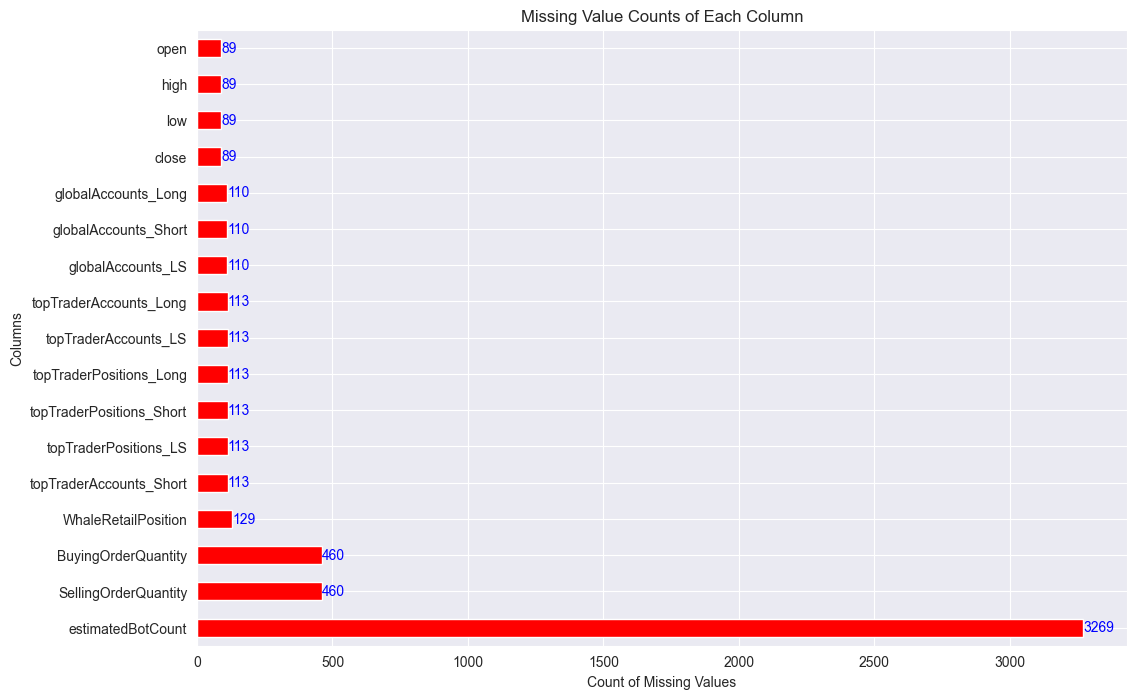

In [44]:
def visualize_missing_value_counts(df=bitcoin_df):
    # Plot bar chart to display missing value counts of features
    plt.figure(figsize=(12, 8))
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values.plot(kind='barh', color='red')
    
    # Adding instance count on the graph
    for i, v in enumerate(missing_values):
        plt.text(v + 1, i, str(v), color='blue', va='center')
    
    # Plot NaN value graph
    plt.xlabel('Count of Missing Values')
    plt.ylabel('Columns')
    plt.title('Missing Value Counts of Each Column')
    plt.show()

visualize_missing_value_counts()

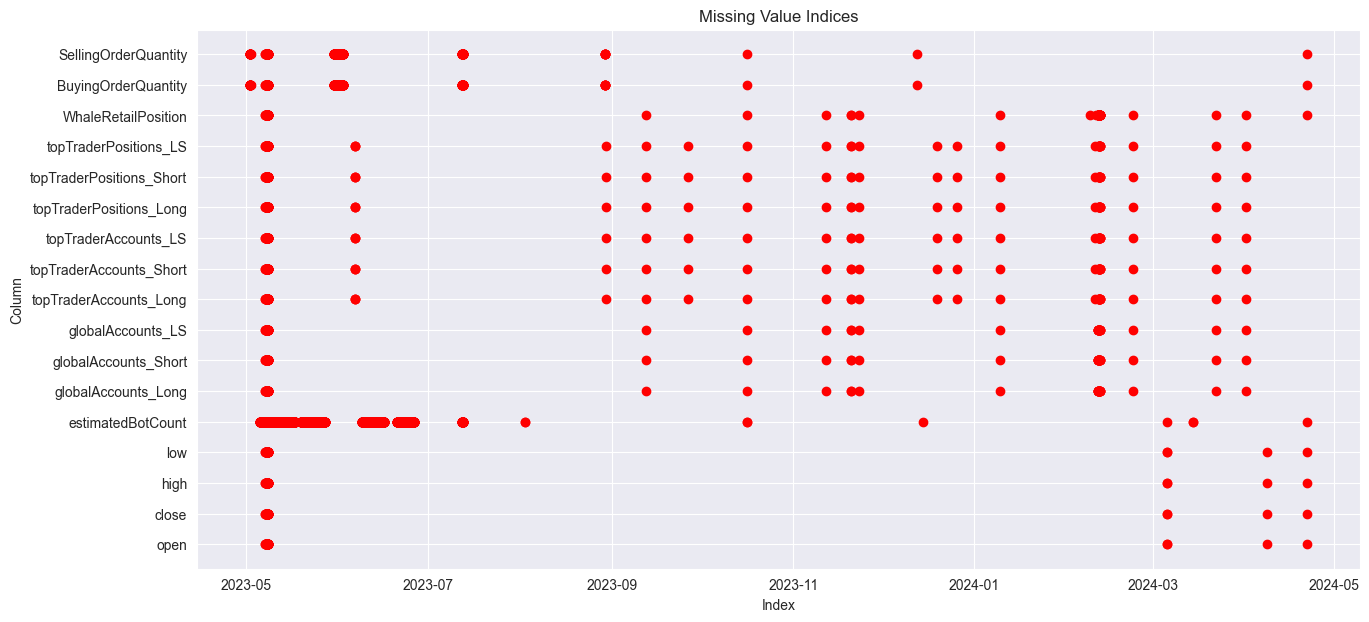

In [45]:
def visualize_missing_value_indexes(df=bitcoin_df):
    # Create a DataFrame to store missing value indices
    missing_indices = df.isnull().astype(int)
    
    # Plot missing value indices
    plt.figure(figsize=(15, 7))
    y_missing, y_non_missing = [], []
    for i, column in enumerate(df.columns):
        missing_values = missing_indices[column][missing_indices[column] == 1].index
        non_missing_values = missing_indices[column][missing_indices[column] == 0].index
        y_missing.extend([i] * len(missing_values))
        y_non_missing.extend([i + 0.5] * len(non_missing_values))
        plt.scatter(missing_values, [i] * len(missing_values), marker='o', color='red', label='Missing Values' if i == 0 else None)
    
    plt.yticks(range(len(df.columns)), df.columns)
    plt.title('Missing Value Indices')
    plt.xlabel('Index')
    plt.ylabel('Column')
    plt.show()

visualize_missing_value_indexes()

- **The API returns NaN when the system does not detect any bot at this interval, therefore we will fill the NaN values with 0 in the estimatedBotCount**
- **Most of the features have same consecutive NaN values at the end, therefore drop these rows**
- **Impute remain features with the linear interpolation**

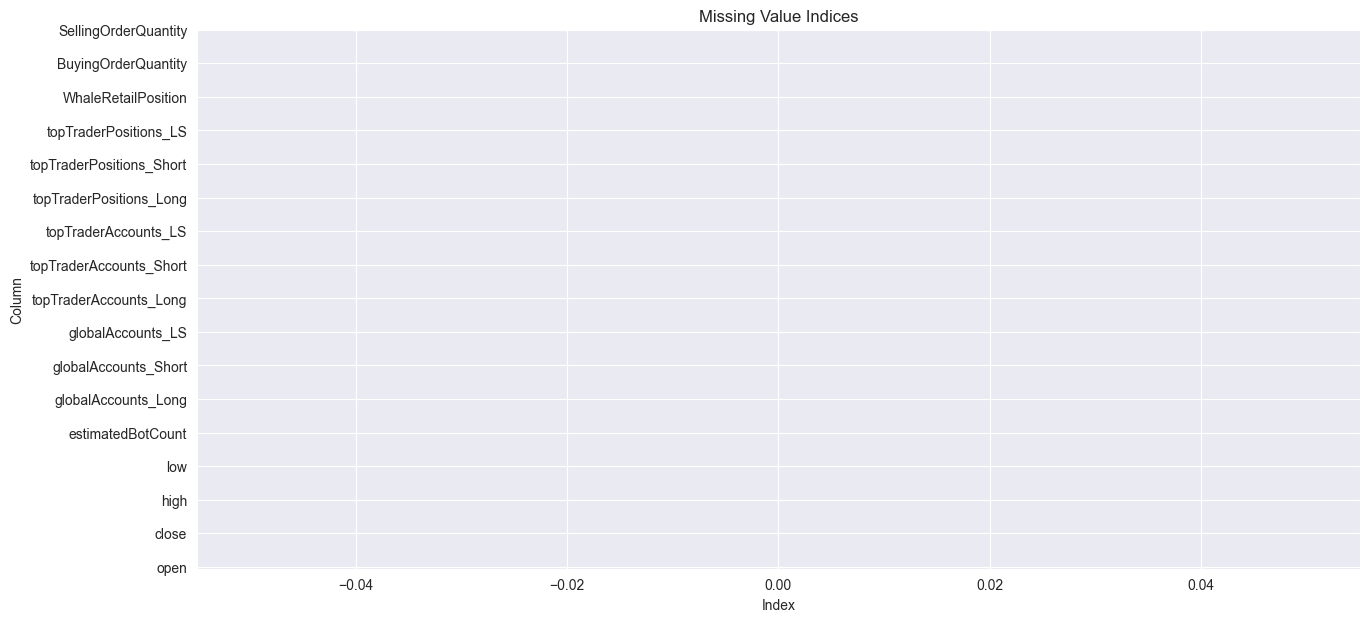

In [46]:
# Impute the NaN values of estimatedBotCount with 0
bitcoin_df.fillna({'estimatedBotCount': 0}, inplace=True)
# Choose the NaN values at the end using "open" feature as guidance
bitcoin_df.dropna(subset=["open"], inplace=True)
# Impute remain NaN values with linear interpolation
bitcoin_df.interpolate(method="linear", axis=0, inplace=True)

# Display NaN value counts after missing value handling
visualize_missing_value_indexes()

<a id=2.3></a>
## 2.3 Outlier Analysis

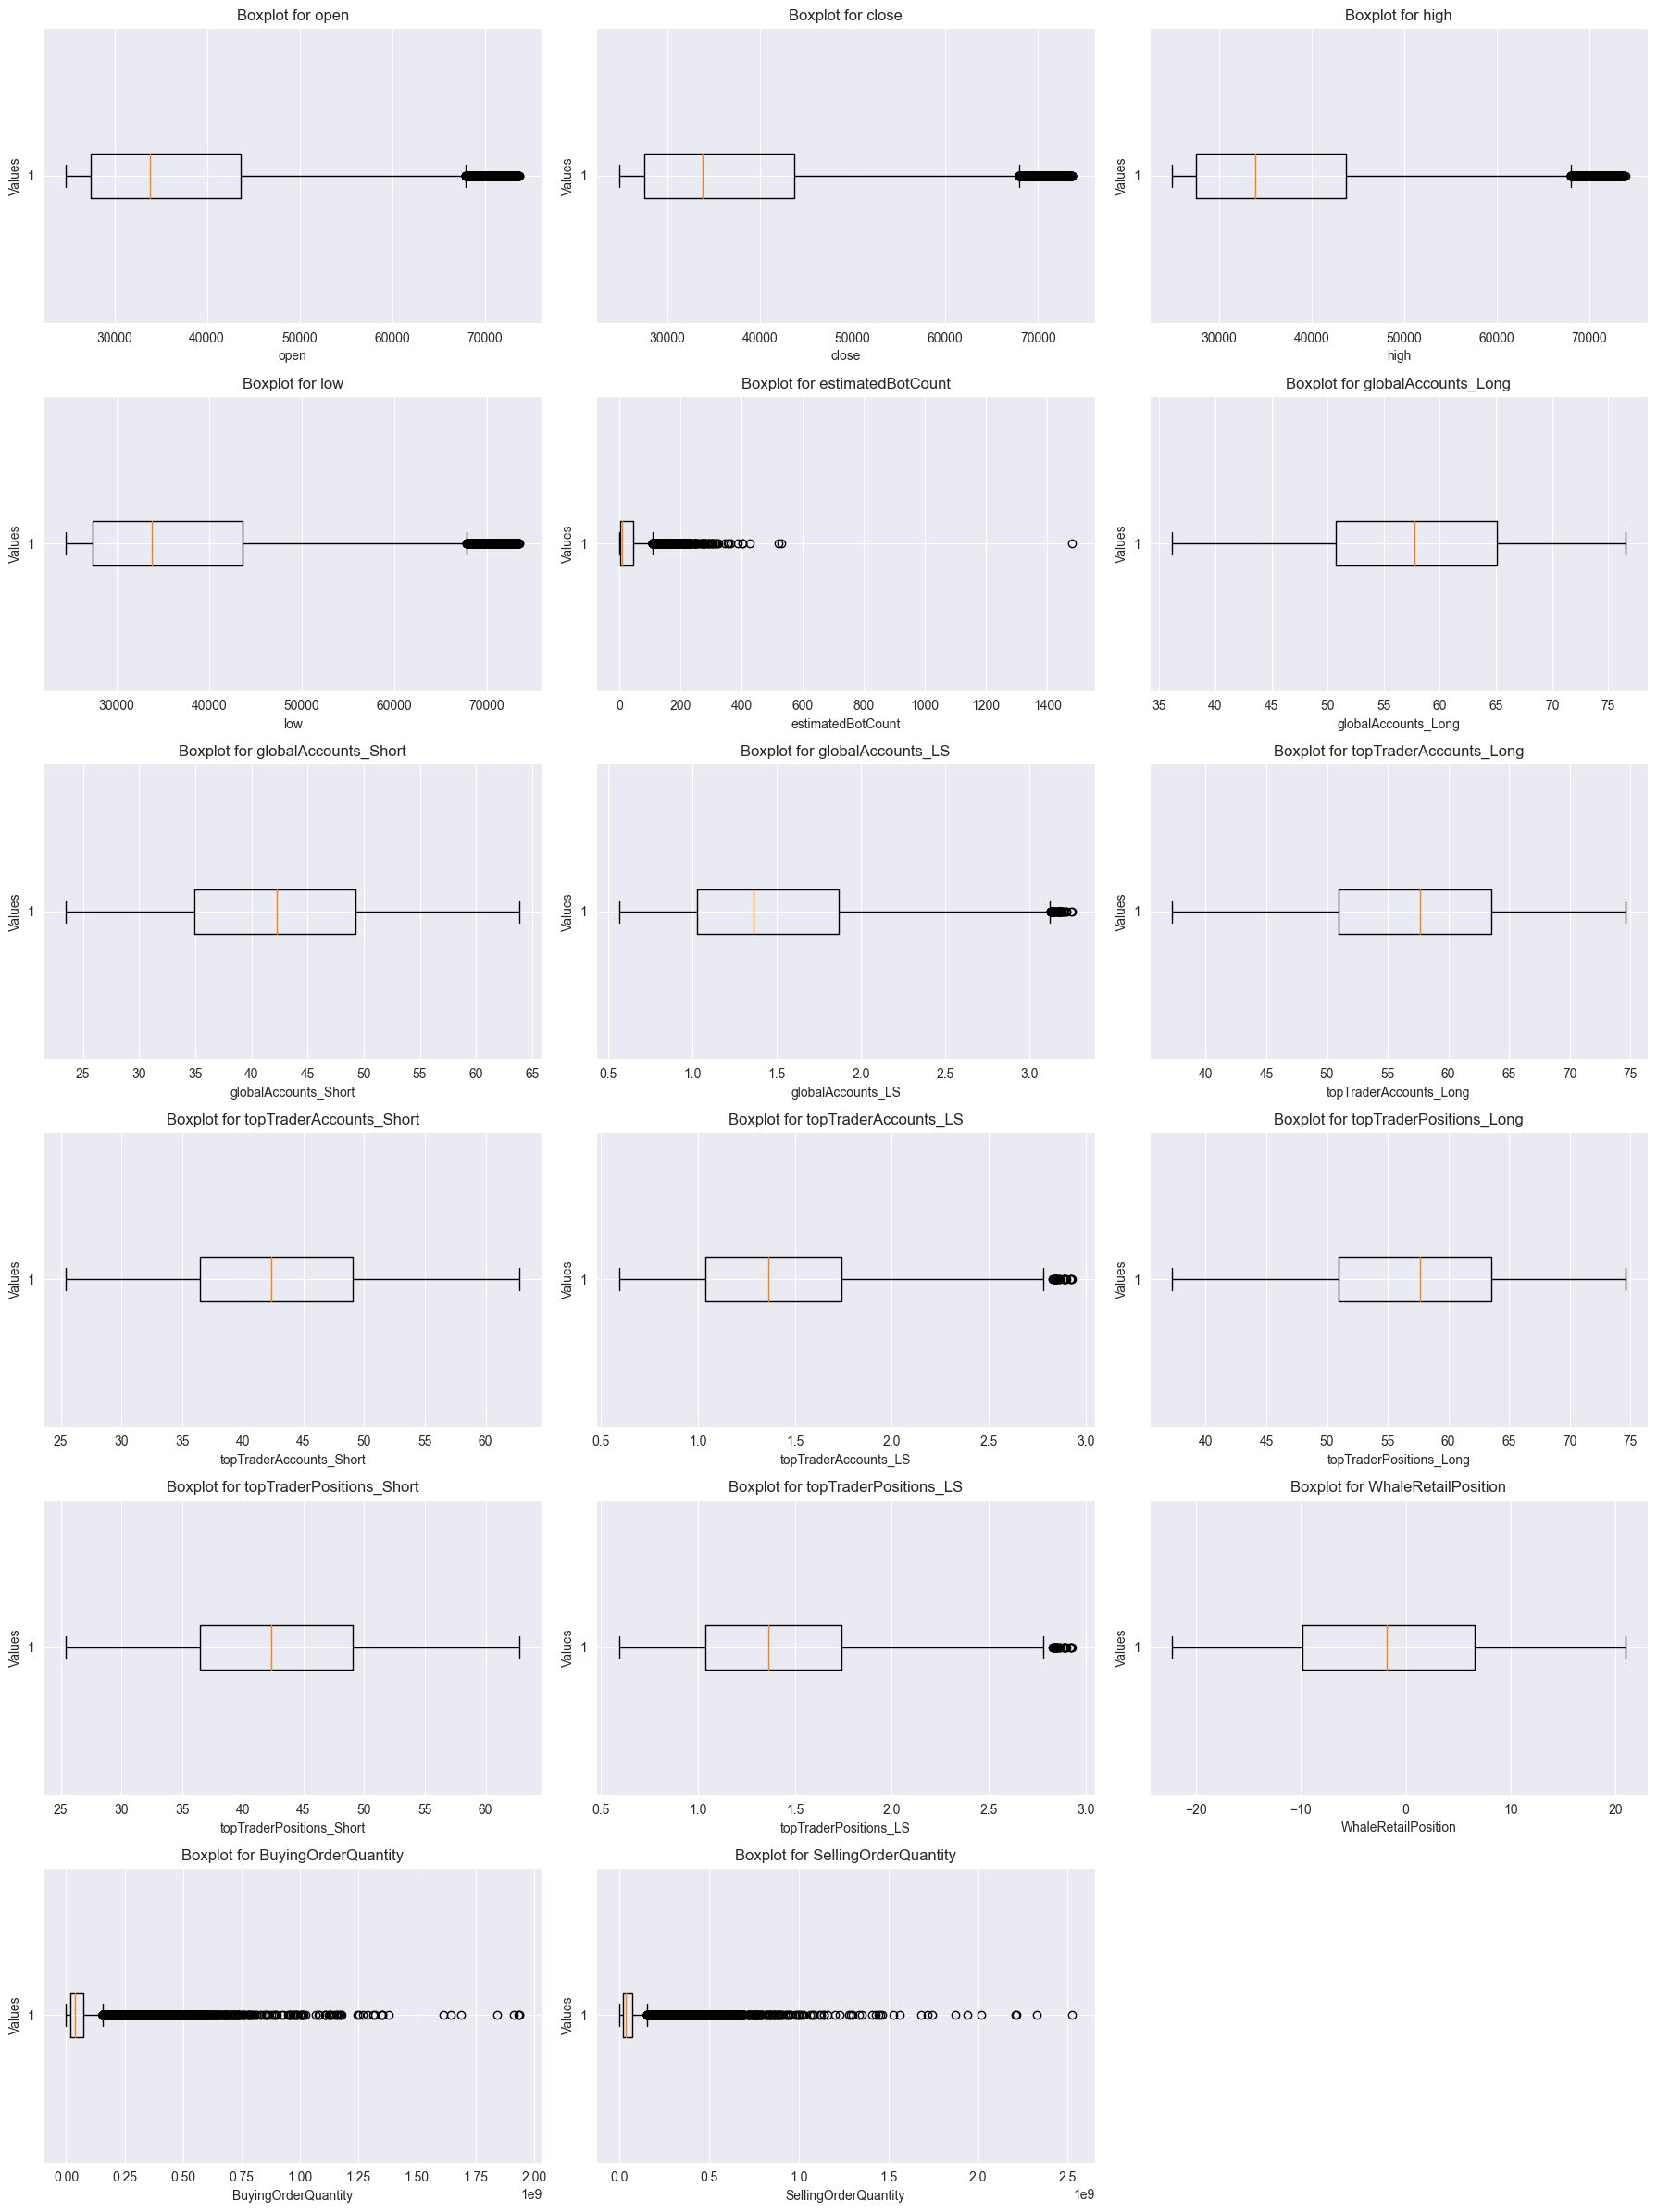

In [47]:
# Create a 6x3 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))

# Flatten the axes array
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(bitcoin_df.columns):
    axes[i].boxplot(bitcoin_df[column], vert=False)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Boxplot for {column}')

# Hide any extra subplots
for j in range(len(bitcoin_df.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**The boxplot figure demonstrated that some of the features have outliers but data that used for the project is time-series so, these points can be extrema. However, these outliers provide valuable insights into extreme market conditions and trading behaviors, while respecting the inherent volatility of cryptocurrency markets. Therefore, the outliers will be protected instead of dropping or smoothing them.**

<a id=2.4></a>
## 2.4 Feature Selection and Engineering

In [48]:
# Drop the features that have LS feature which represent the Long-Short ratio
bitcoin_df.drop(columns=["globalAccounts_Long", "globalAccounts_Short",
                         "topTraderAccounts_Long", "topTraderAccounts_Short",
                         "topTraderPositions_Long", "topTraderPositions_Short"], inplace=True)

# Check first 5 row of feature selected dataframe
display(bitcoin_df.head())

,open,close,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,
2024-04-21 18:30:00+00:00,64810.0,64770.4,64810.0,64717.2,12.0,1.3901,1.4540,1.4540,-2.78,1.500585e+07,2.328670e+07
2024-04-21 18:15:00+00:00,64819.8,64810.0,64819.8,64687.7,39.0,1.3906,1.4516,1.4516,-2.68,3.674641e+07,4.003513e+07
2024-04-21 18:00:00+00:00,64793.0,64819.8,64847.7,64600.0,47.0,1.4010,1.4534,1.4534,-2.98,4.500680e+07,7.044362e+07
2024-04-21 17:45:00+00:00,64721.3,64793.0,64859.0,64713.4,20.0,1.4079,1.4576,1.4576,-3.10,4.129480e+07,3.586159e+07
2024-04-21 17:30:00+00:00,64636.5,64721.3,64788.0,64615.3,29.0,1.3981,1.4522,1.4522,-2.81,6.551020e+07,5.254361e+07


<a id=2.5></a>
## 2.5 Splitting Data Into Train, Validation and Test

In [49]:
def train_val_split(df, train_ratio = 0.9, val_ratio = 0.05):

    # Determine the sizes of each set
    total_samples = len(df)
    train_size = int(total_samples * 0.9)  # 90% for training
    val_size = int(total_samples * 0.05)   # 5% for validation
    test_size = total_samples - train_size - val_size # 5% for testing

    # Split the DataFrame
    train_df = df.iloc[:train_size]
    val_df = df.iloc[train_size:train_size + val_size]
    test_df = df.iloc[train_size + val_size:]

    return train_df, val_df, test_df


bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df = bitcoin_df.asfreq('15min')
bitcoin_df.interpolate(method="linear", axis=0, inplace=True)  # NaN values due to mismatch in time frequency using interpolation (35 per feature)

train_df_original, val_df_original, test_df_original = train_val_split(bitcoin_df)

print(f"Training set size: {len(train_df_original)}")
print(f"Validation set size: {len(val_df_original)}")
print(f"Test set size: {len(test_df_original)}")

Training set size: 31134
Validation set size: 1729
Test set size: 1731


<a id=2.6></a>
## 2.6 Scaling Data

In [50]:
# Extract column names
column_names = train_df_original.columns

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the data
train_scaled = scaler.fit_transform(train_df_original)
val_scaled = scaler.transform(val_df_original)
test_scaled = scaler.transform(test_df_original)

# Create new DataFrames with scaled data and original column names
train_df = pd.DataFrame(train_scaled, columns=column_names, index=train_df_original.index)
val_df = pd.DataFrame(val_scaled, columns=column_names, index=val_df_original.index)
test_df = pd.DataFrame(test_scaled, columns=column_names, index=test_df_original.index)

<a id=2.7></a>
## 2.7 Splitting Target and Input Features

In [51]:
# Training set

X_train = train_df.drop(columns=['close'])
y_train = train_df['close']

# Validation set
X_val = val_df.drop(columns=['close'])
y_val = val_df['close']

# Test set
X_test = test_df.drop(columns=['close'])
y_test = test_df['close']

In [52]:
X_train.index[0],  X_val.index[0], X_test.index[0]

(Timestamp('2023-04-27 10:15:00+0000', tz='UTC', freq='15T'),
 Timestamp('2024-03-16 17:45:00+0000', tz='UTC', freq='15T'),
 Timestamp('2024-04-03 18:00:00+0000', tz='UTC', freq='15T'))

<a id=3></a>
# 3. METHODOLOGY

In [53]:
# Window generator
def sliding_window_generator(x_df, y_df, window_size, step_size, forecast_horizon=1):
    """
    Generate sliding windows from two pandas DataFrames.

    Args:
        x_df (pandas.DataFrame): Input DataFrame.
        y_df (pandas.DataFrame): Output DataFrame.
        window_size (int): Size of the sliding window.
        step_size (int): Step size for sliding the window.
        forecast_horizon (int): Number of steps to forecast into the future.

    Returns:
        tuple: Tuple containing two numpy.ndarrays:
               - seq_x: Input sequences
               - seq_y: Corresponding output sequences
    """
    x_data = x_df.values
    y_data = y_df.values
    num_samples = len(x_data)
    seq_x, seq_y = [], []
    for i in range(0, num_samples - window_size - forecast_horizon + 1, step_size):
        x_window = x_data[i:i + window_size]
        y_window = y_data[i + window_size:i + window_size + forecast_horizon]
        seq_x.append(x_window)  # Input sequence
        seq_y.append(y_window)  # Corresponding output
    return np.array(seq_x), np.array(seq_y)


# For drawing predictions vs truth graph.
def plot_predictions(truth, preds):
    plt.figure(figsize=(10, 6))
    plt.plot(truth, label='Actual', color='blue')
    plt.plot(preds, label='Predicted', color='red')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Test Predictions vs Actual')
    plt.legend()
    plt.grid(True)
    plt.show()


def evaluate_predictions(model_name, truth, preds):
    # Convert inputs to numpy arrays
    truth = np.array(truth)
    preds = np.array(preds)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(truth, preds))

    # Calculate MAE
    mae = mean_absolute_error(truth, preds)

    # Calculate R2
    r2 = r2_score(truth, preds)

    # Print the evaluation metrics
    print(f"Evaluation Metrics of {model_name}:\n"
      "----------------------------------------")
    print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2) Score: {:.4f}".format(r2))


<a id=3.1></a>
## 3.1 Machine Learning Models

<a id=3.1.1></a>
### 3.1.1 Linear Regression Model

In [18]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size=1, step_size=1,forecast_horizon=1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val,  window_size=1, step_size=1,forecast_horizon=1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test,  window_size=1, step_size=1,forecast_horizon=1)

# Initialize Linear Regressor
lin_reg = LinearRegression()

# Train the Linear Regression model
lin_reg.fit(train_seq_x.reshape(len(train_seq_x), -1), train_seq_y)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(test_seq_x.reshape(len(test_seq_x), -1))

Evaluation Metrics of Linear Regression Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0051
Mean Absolute Error (MAE): 0.0034
R-squared (R2) Score: 0.9931


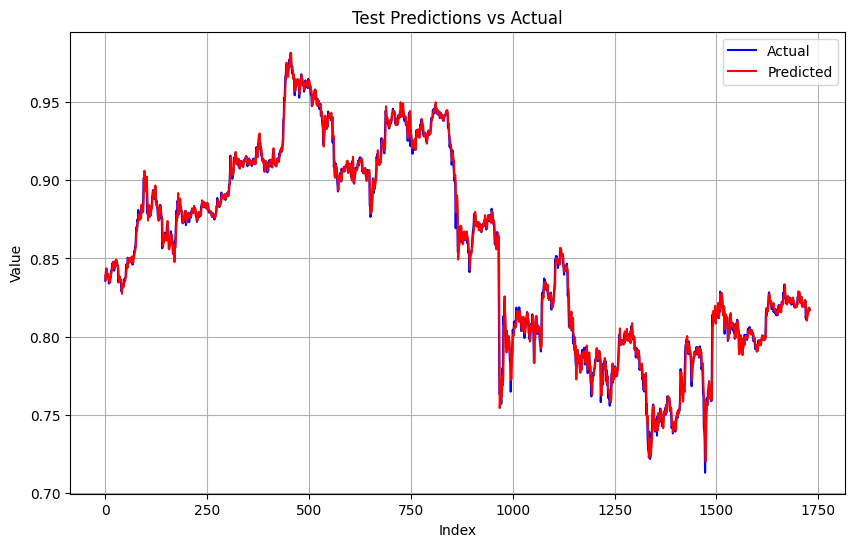

In [19]:
# Evaluation of Predictions
evaluate_predictions("Linear Regression Model", test_seq_y, y_pred_lin)

# Plot predictions
plot_predictions(test_seq_y, y_pred_lin)

<a id=3.1.2></a>
### 3.1.2 Random Forest Regression Model

In [22]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size=1, step_size=1,forecast_horizon=1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val,  window_size=1, step_size=1,forecast_horizon=1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test,  window_size=1, step_size=1,forecast_horizon=1)

# Initialize Random Forest regressor
rf_reg = RandomForestRegressor(
    n_estimators=50,
    max_depth=25,
    min_samples_split=18,
    min_samples_leaf=10,
    random_state=42
)

# Train the Random Forest model
rf_reg.fit(train_seq_x.reshape(len(train_seq_x), -1), train_seq_y.ravel())

# Make predictions on the test set
y_pred_rf = rf_reg.predict(test_seq_x.reshape(len(test_seq_x), -1))

Evaluation Metrics of Random Forest Regression Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0060
Mean Absolute Error (MAE): 0.0040
R-squared (R2) Score: 0.9907


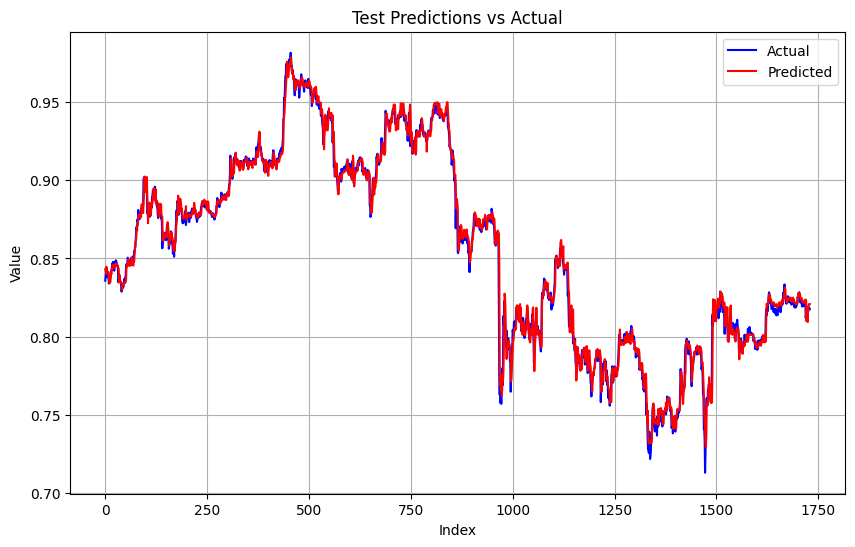

In [23]:
# Evaluation of Predictions
evaluate_predictions("Random Forest Regression Model", test_seq_y, y_pred_rf)

# Plot predictions
plot_predictions(test_seq_y, y_pred_rf)

<a id=3.1.3></a>
### 3.1.3 XGBoost Regression Model

In [24]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, 1, 1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, 1, 1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, 1, 1)

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42,
                           early_stopping_rounds=25)

# Train the XGBoost model with early stopping based on the validation set
xgb_reg.fit(train_seq_x.reshape(len(train_seq_x), -1), train_seq_y,
             eval_set=[(val_seq_x.reshape(len(val_seq_x), -1), val_seq_y)], verbose=0)

# Make predictions on the test set
y_pred = xgb_reg.predict(test_seq_x.reshape(len(test_seq_x), -1))

Evaluation Metrics of XGBoost Regression Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0129
Mean Absolute Error (MAE): 0.0094
R-squared (R2) Score: 0.9566


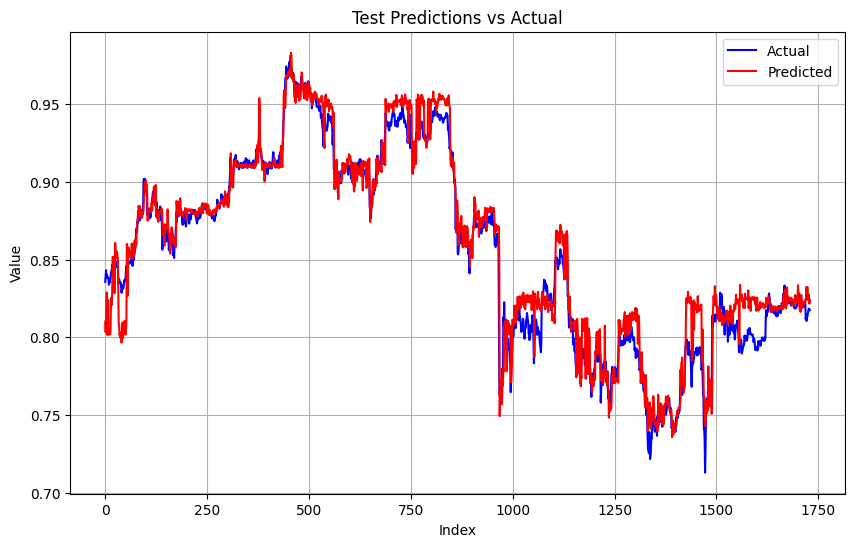

In [25]:
# Evaluation of Predictions
evaluate_predictions("XGBoost Regression Model", test_seq_y, y_pred)

# Plot predictions
plot_predictions(test_seq_y, y_pred)

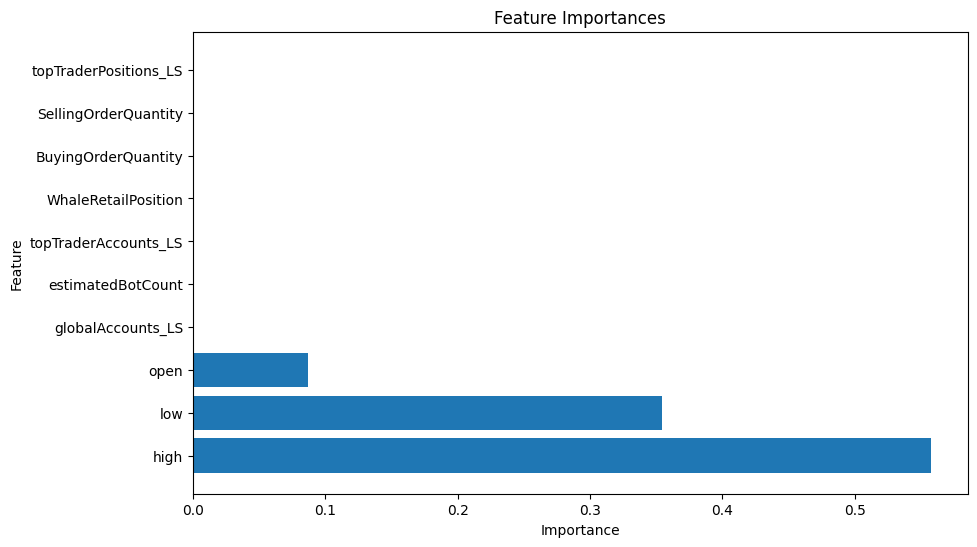

In [26]:
# Get feature names from X_test (assuming X_test is a pandas DataFrame)
feature_names = X_test.columns.tolist()

# Get feature importances and zip them with feature names
feature_importances = xgb_reg.feature_importances_
feature_importances_with_names = list(zip(feature_names, feature_importances))

# Sort feature importances by importance value
feature_importances_with_names.sort(key=lambda x: x[1], reverse=True)

# Visualize feature importances
importance_df = pd.DataFrame(feature_importances_with_names, columns=['Feature', 'Importance'])
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<a id=3.2></a>
## 3.2 Traditional Forecasting Models

<a id=3.2.1></a>
### 3.2.1 SARIMAX (Seasonal Autoregressive Integrated Moving Average Exogenous) Model

In [27]:
# Get the best orders, including both non-seasonal and seasonal orders
stepwise_fit = auto_arima(y=y_train, seasonal=True)
best_order = stepwise_fit.order
best_seasonal_order = stepwise_fit.seasonal_order
print(f"Best order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")

Best order: (1, 2, 5)
Best seasonal order: (0, 0, 0, 0)


In [30]:
# Train the model
order = (2, 1, 4)  # Example non-seasonal orders (p, d, q)
seasonal_order = (0, 0, 0, 0)  # Example seasonal orders (P, D, Q, m)
model = SARIMAX(
        y_train,
        exog=X_train,
        order=order,
        seasonal_order=seasonal_order
    )
model = model.fit()

# Make predictions on the test data
y_test_pred = model.forecast(exog=X_test, steps=len(X_test))

Evaluation Metrics of SARIMAX Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0267
Mean Absolute Error (MAE): 0.0228
R-squared (R2) Score: 0.8132


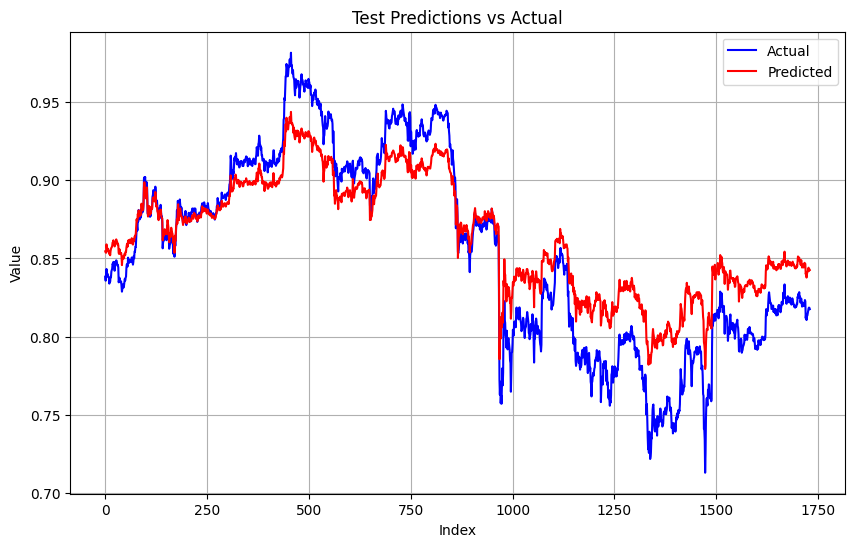

In [31]:
# Evaluation of predictions
evaluate_predictions("SARIMAX Model", y_test, y_test_pred)

# Plot predictions
plot_predictions(np.array(y_test), np.array(y_test_pred))

<a id=3.2.2 Prophet></a>
### 3.2.2 Prophet Model

In [32]:
# Copy original train_df to use further
prophet_df = train_df_original.copy()

In [33]:
# Preprocess the train data for prophet model
prophet_train = train_df_original.rename(columns={"close": "y"})
prophet_train["ds"] = train_df.index.tz_localize(None)
prophet_train.reset_index(drop=True, inplace=True)

# Use log-domain for prophet model
prophet_train["y_original"] = prophet_train["y"].copy()
prophet_train["y"] = np.log(prophet_train["y"])

# Display train data for prophet model
prophet_train.head(5)

,open,y,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity,ds,y_original
0,28959.3,10.272883,29000.0,28930.8,48.0,1.2257,1.1286,1.1286,-0.17,4.311050e+07,5.464228e+07,2023-04-27 10:15:00,28937.2
1,28937.2,10.275286,29019.4,28937.0,44.0,1.2242,1.1281,1.1281,-0.12,5.897624e+07,3.443539e+07,2023-04-27 10:30:00,29006.8
2,29006.8,10.274427,29029.0,28943.0,65.0,1.2282,1.1299,1.1299,-0.23,5.094587e+07,5.778385e+07,2023-04-27 10:45:00,28981.9
3,28981.9,10.277723,29139.2,28960.0,53.0,1.2311,1.1299,1.1299,-0.30,2.054326e+08,1.598568e+08,2023-04-27 11:00:00,29077.6
4,29077.6,10.276268,29084.6,29025.4,119.0,1.2743,1.1515,1.1515,-1.24,6.229194e+07,8.039308e+07,2023-04-27 11:15:00,29035.3


In [34]:
# Build and train model
prophet_model = Prophet()

regressor_list = ['open', 'high', 'low', 'estimatedBotCount', 'globalAccounts_LS', 'topTraderAccounts_LS', 
                  'topTraderPositions_LS', 'WhaleRetailPosition', 'BuyingOrderQuantity', 'SellingOrderQuantity']

for regressor in regressor_list:
    prophet_model.add_regressor(regressor)

prophet_model.fit(prophet_train)

21:00:37 - cmdstanpy - INFO - Chain [1] start processing
21:01:03 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Preprocess the test data to use for Prophet model
prophet_df = pd.concat([prophet_df, test_df_original], ignore_index=False)
prophet_df = prophet_df.rename(columns={"close": "y"})
prophet_df["ds"] = prophet_df.index.tz_localize(None)
prophet_df.reset_index(drop=True, inplace=True)

# Create future data for Prophet model
future_data = prophet_model.make_future_dataframe(periods=96, freq="15min")
future_data = prophet_df[['open', 'high', 'low', 'estimatedBotCount', 'globalAccounts_LS', 'topTraderAccounts_LS', 
                          'topTraderPositions_LS', 'WhaleRetailPosition', 'BuyingOrderQuantity', 'SellingOrderQuantity', 
                          'ds']]

future_data.head(5)

,open,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity,ds
0,28959.3,29000.0,28930.8,48.0,1.2257,1.1286,1.1286,-0.17,4.311050e+07,5.464228e+07,2023-04-27 10:15:00
1,28937.2,29019.4,28937.0,44.0,1.2242,1.1281,1.1281,-0.12,5.897624e+07,3.443539e+07,2023-04-27 10:30:00
2,29006.8,29029.0,28943.0,65.0,1.2282,1.1299,1.1299,-0.23,5.094587e+07,5.778385e+07,2023-04-27 10:45:00
3,28981.9,29139.2,28960.0,53.0,1.2311,1.1299,1.1299,-0.30,2.054326e+08,1.598568e+08,2023-04-27 11:00:00
4,29077.6,29084.6,29025.4,119.0,1.2743,1.1515,1.1515,-1.24,6.229194e+07,8.039308e+07,2023-04-27 11:15:00


In [36]:
# Forecasting with test data
prophet_forecast_data = prophet_model.predict(future_data)

# Display the last 5 predictions
prophet_forecast_data[['open', 'high', 'low', 'estimatedBotCount', 'globalAccounts_LS', 'topTraderAccounts_LS', 
               'topTraderPositions_LS', 'WhaleRetailPosition', 'BuyingOrderQuantity', 'SellingOrderQuantity', 
               'ds']].tail(5)

,open,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity,ds
32860,-0.152891,0.333316,0.365006,-0.000014,-0.002165,-0.001331,-0.001331,-0.002076,0.000073,0.000197,2024-04-21 17:30:00
32861,-0.153337,0.334127,0.366236,0.000059,-0.001796,-0.001460,-0.001460,-0.002422,-0.000505,0.000516,2024-04-21 17:45:00
32862,-0.153714,0.333998,0.364815,-0.000160,-0.002056,-0.001360,-0.001360,-0.002279,-0.000416,-0.000145,2024-04-21 18:00:00
32863,-0.153855,0.333679,0.365914,-0.000095,-0.002447,-0.001317,-0.001317,-0.001922,-0.000614,0.000436,2024-04-21 18:15:00
32864,-0.153803,0.333567,0.366284,0.000124,-0.002466,-0.001374,-0.001374,-0.002041,-0.001133,0.000756,2024-04-21 18:30:00


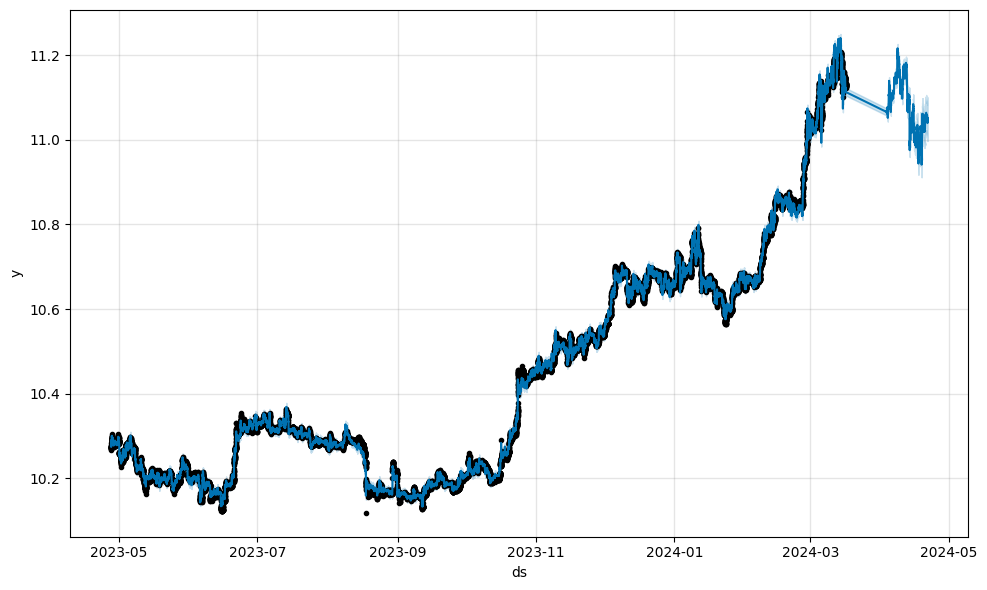

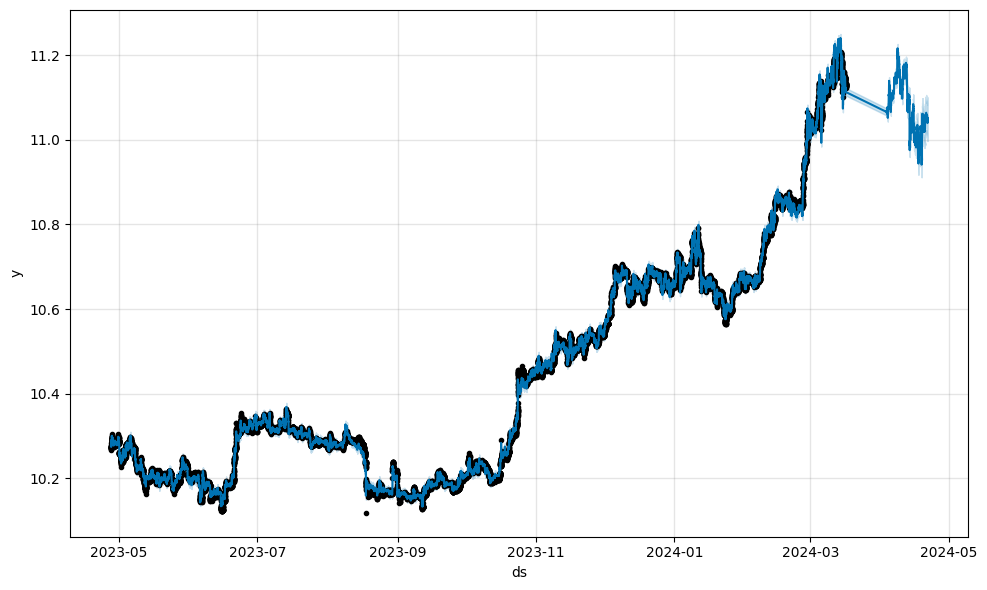

In [37]:
# Plot the information from Prophet model
prophet_model.plot(prophet_forecast_data)

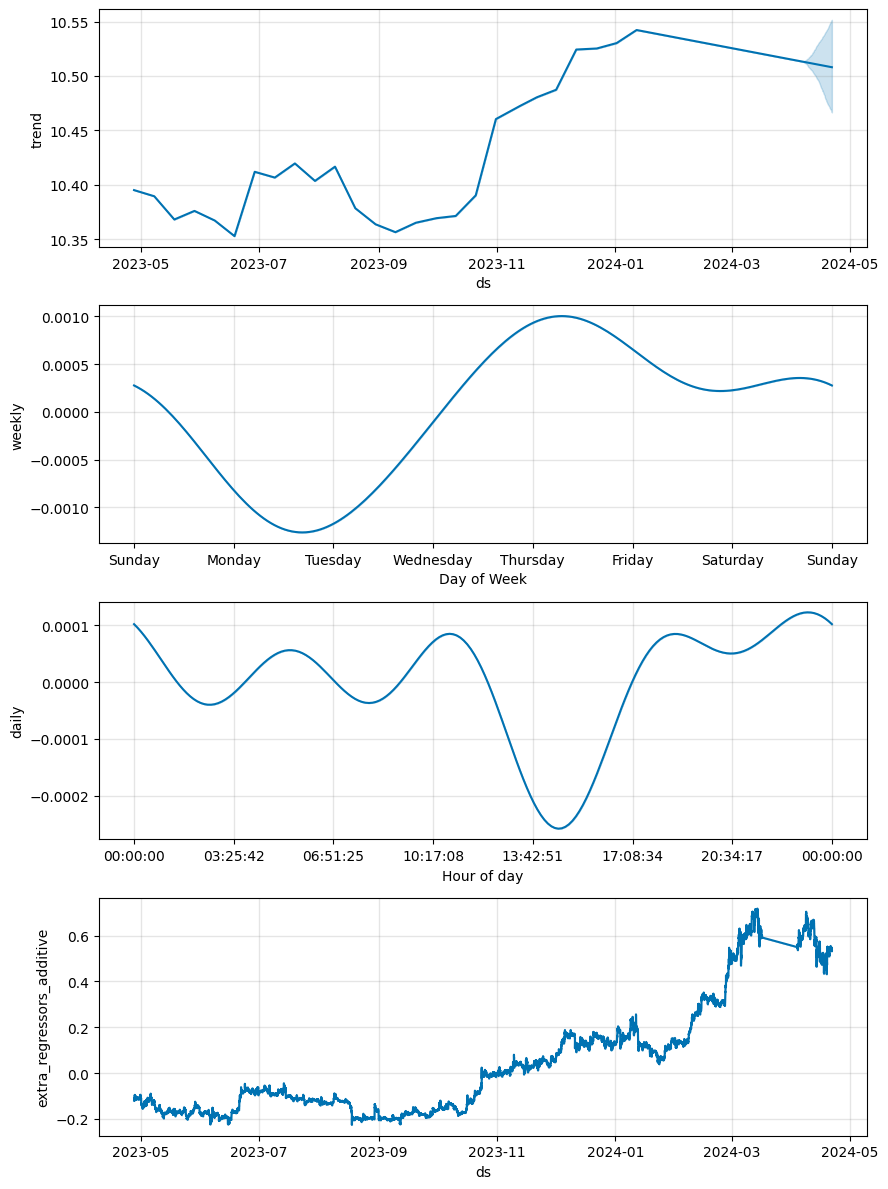

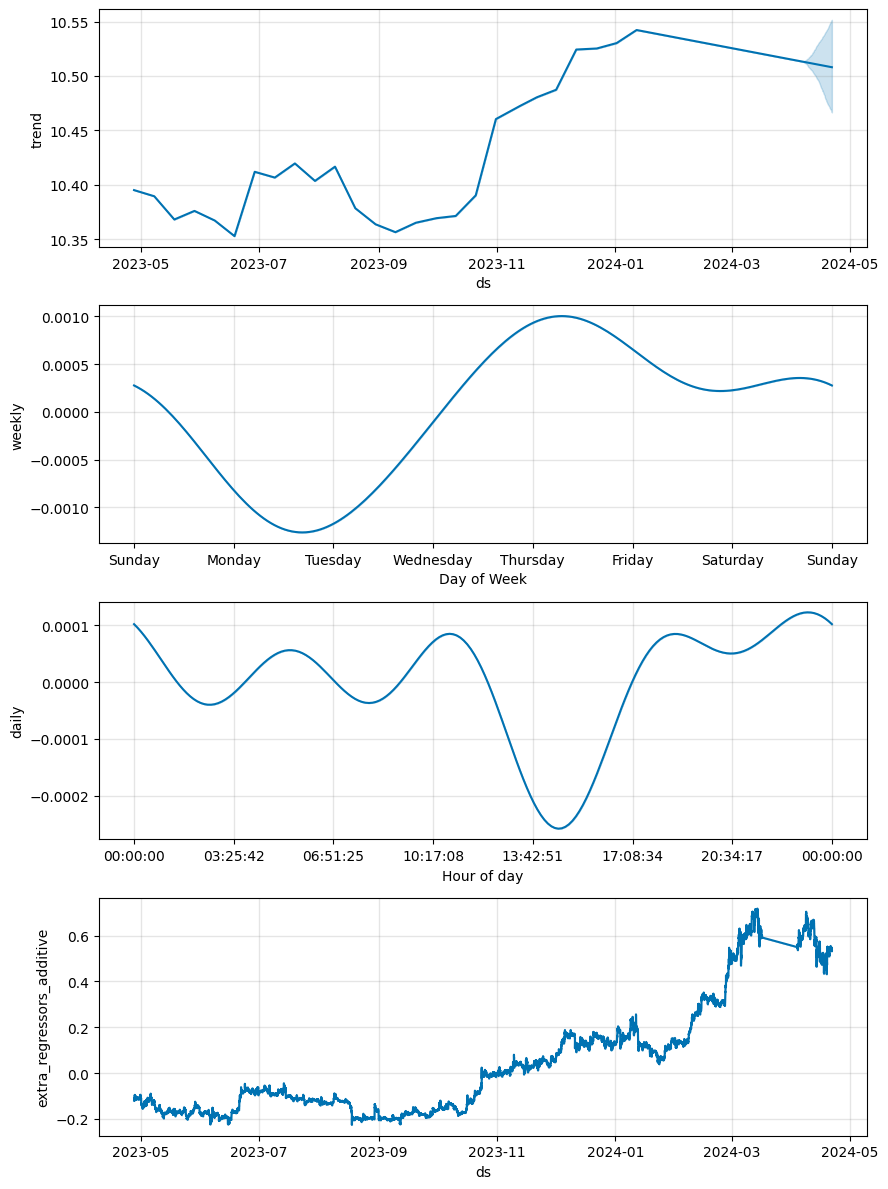

In [38]:
# Plot the Prophet model components
prophet_model.plot_components(prophet_forecast_data)

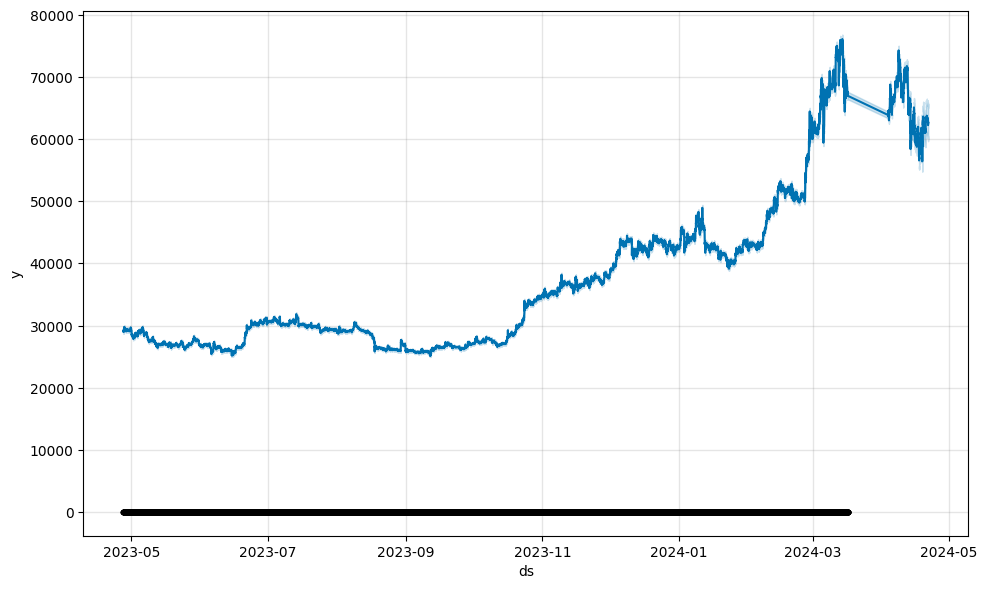

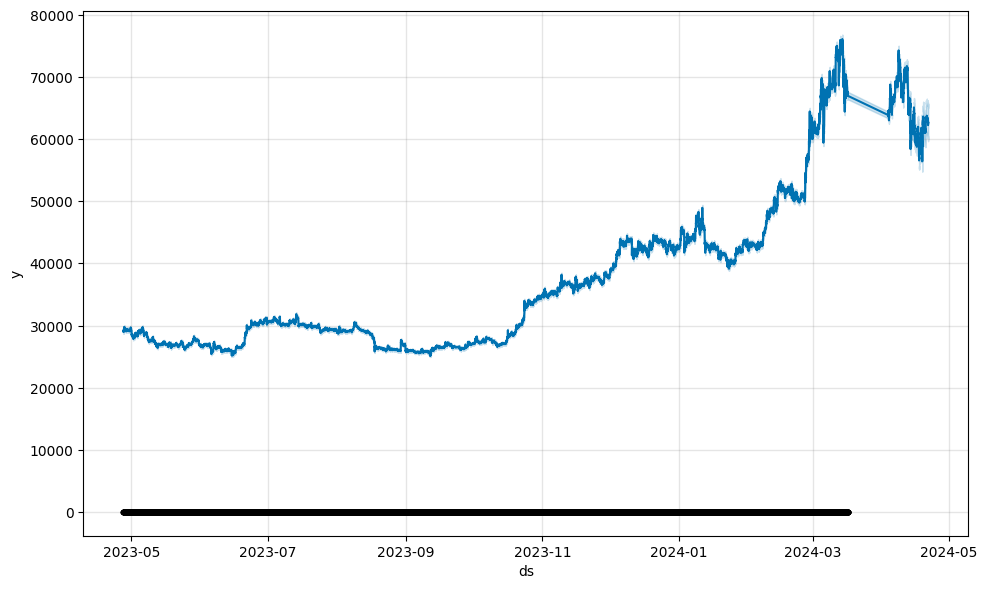

In [39]:
# Correct the log domain with exponential
prophet_forecast_data_original = prophet_forecast_data.copy()
prophet_forecast_data_original["yhat"] = np.exp(prophet_forecast_data_original["yhat"])
prophet_forecast_data_original["yhat_lower"] = np.exp(prophet_forecast_data_original["yhat_lower"])
prophet_forecast_data_original["yhat_upper"] = np.exp(prophet_forecast_data_original["yhat_upper"])
prophet_result_df = pd.DataFrame(prophet_forecast_data_original)

# Plot the exact prophet results without log domain
prophet_model.plot(prophet_forecast_data_original)

Evaluation Metrics of Prophet Model:
----------------------------------------
Root Mean Squared Error (RMSE): 1916.5396
Mean Absolute Error (MAE): 1912.3229
R-squared (R2) Score: -66.4424


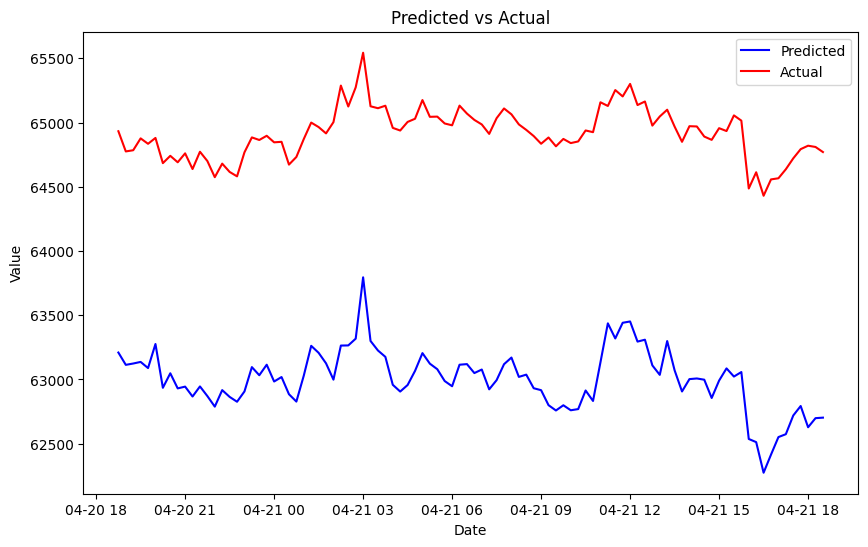

In [44]:
# Evaluation of predictions
evaluate_predictions("Prophet Model", prophet_result_df.iloc[-96:]["yhat"], test_df_original["close"].iloc[-96:])

# Plot the forecasting results of Prophet model
plt.figure(figsize=(10, 6))
plt.plot(prophet_result_df.iloc[-96:]["ds"], prophet_result_df.iloc[-96:]["yhat"], label="Predicted", color="blue")
plt.plot(prophet_result_df.iloc[-96:]["ds"], test_df_original["close"].iloc[-96:], label="Actual", color="red")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

<a id=3.3></a>
## 3.3 Deep Learning Models

<a id=3.3.1></a>
### 3.3.1 LSTM-FCN

In [45]:
class LSTM_FCN_Model:

    def __init__(self, input_shape, num_classes, lstm_units=256, conv_filters=128, kernel_size=7):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.lstm_units = lstm_units
        self.conv_filters = conv_filters
        self.kernel_size = kernel_size

    def build_model(self):
        inputs = tf.keras.layers.Input(shape=self.input_shape)

        # LSTM layer
        lstm_out = tf.keras.layers.LSTM(self.lstm_units)(inputs)
        lstm_out = tf.keras.layers.Dropout(0.25)(lstm_out)

        # Permute layer
        permute_out = tf.keras.layers.Permute((2, 1))(inputs)

        # Convolutional layers
        conv_out = tf.keras.layers.Conv1D(self.conv_filters, self.kernel_size, padding='same', kernel_initializer='he_uniform')(permute_out)
        conv_out = tf.keras.layers.BatchNormalization()(conv_out)
        conv_out = tf.keras.layers.Activation('gelu')(conv_out)

        # Global average pooling layer
        conv_out = tf.keras.layers.GlobalAveragePooling1D()(conv_out)

        # Concatenate LSTM and Convolutional outputs
        combined_out = tf.keras.layers.concatenate([lstm_out, conv_out])

        # Output layer
        outputs = tf.keras.layers.Dense(self.num_classes)(combined_out)

        # Create model
        model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

        return model

In [46]:
# Define parameters
window_size = 12
step_size = 1
input_shape = (window_size, 10)  # Define num_features
num_classes = 1  # regression problem

# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size, step_size)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, window_size, step_size)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, window_size, step_size)


# Initialize and build the model
model = LSTM_FCN_Model(input_shape, num_classes).build_model()

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, verbose=1, min_lr=1e-7)


optimizer = tf.optimizers.Adam(learning_rate=1e-2)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(train_seq_x, train_seq_y, validation_data=(val_seq_x, val_seq_y), epochs=200, batch_size=64,
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

Epoch 1/200
487/487 [==============================] - 8s 8ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0145 - val_mse: 0.0145 - lr: 0.0100
Epoch 2/200
487/487 [==============================] - 4s 8ms/step - loss: 6.6754e-04 - mse: 6.6754e-04 - val_loss: 4.0891e-04 - val_mse: 4.0891e-04 - lr: 0.0100
Epoch 3/200
487/487 [==============================] - 3s 7ms/step - loss: 4.8190e-04 - mse: 4.8190e-04 - val_loss: 0.0020 - val_mse: 0.0020 - lr: 0.0100
Epoch 4/200
487/487 [==============================] - 4s 7ms/step - loss: 5.4974e-04 - mse: 5.4974e-04 - val_loss: 0.0025 - val_mse: 0.0025 - lr: 0.0100
Epoch 5/200
487/487 [==============================] - 4s 8ms/step - loss: 3.8313e-04 - mse: 3.8313e-04 - val_loss: 0.0010 - val_mse: 0.0010 - lr: 0.0100
Epoch 6/200
487/487 [==============================] - 5s 9ms/step - loss: 2.3276e-04 - mse: 2.3276e-04 - val_loss: 7.5825e-05 - val_mse: 7.5825e-05 - lr: 0.0100
Epoch 7/200
487/487 [==============================] - 5s 9ms/step -

Epoch 44/200
487/487 [==============================] - 4s 9ms/step - loss: 5.5147e-05 - mse: 5.5147e-05 - val_loss: 3.6892e-05 - val_mse: 3.6892e-05 - lr: 6.1035e-07
Epoch 45/200
487/487 [==============================] - 5s 9ms/step - loss: 5.6861e-05 - mse: 5.6861e-05 - val_loss: 3.8074e-05 - val_mse: 3.8074e-05 - lr: 6.1035e-07
Epoch 46/200
485/487 [============================>.] - ETA: 0s - loss: 5.8097e-05 - mse: 5.8097e-05
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.5258788721439487e-07.
487/487 [==============================] - 5s 9ms/step - loss: 5.8051e-05 - mse: 5.8051e-05 - val_loss: 3.8484e-05 - val_mse: 3.8484e-05 - lr: 6.1035e-07
Epoch 47/200
487/487 [==============================] - 5s 10ms/step - loss: 5.6491e-05 - mse: 5.6491e-05 - val_loss: 3.7220e-05 - val_mse: 3.7220e-05 - lr: 1.5259e-07
Epoch 48/200
487/487 [==============================] - 5s 9ms/step - loss: 5.7720e-05 - mse: 5.7720e-05 - val_loss: 3.7683e-05 - val_mse: 3.7683e-05 - lr: 1.5259e-0

In [47]:
# Evaluate the model
test_preds = model.predict(test_seq_x)
test_loss = model.evaluate(test_seq_x, test_seq_y, verbose=0)

54/54 [==============================] - 0s 3ms/step


Evaluation Metrics of LSTM-FCN Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0063
Mean Absolute Error (MAE): 0.0043
R-squared (R2) Score: 0.9898


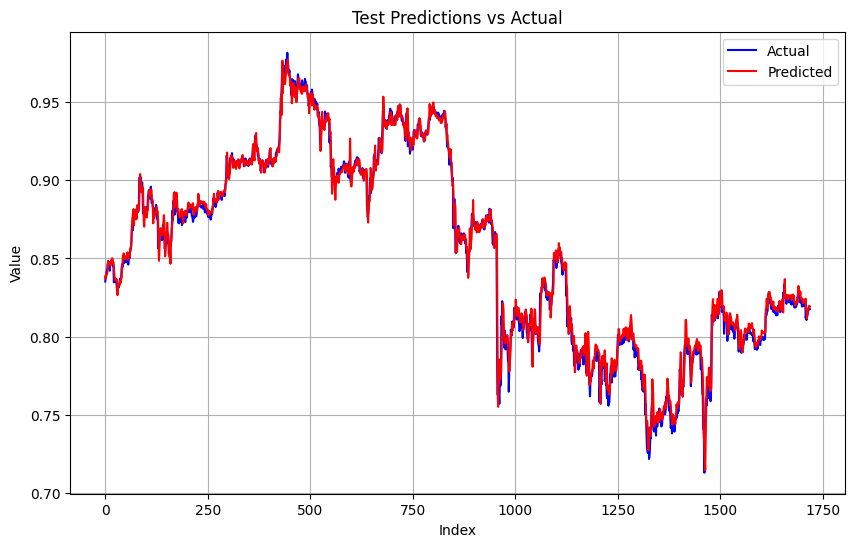

In [48]:
# Evaluation of predictions
evaluate_predictions("LSTM-FCN Model", test_seq_y, test_preds)

# Plot the predictions
plot_predictions(test_seq_y, test_preds)

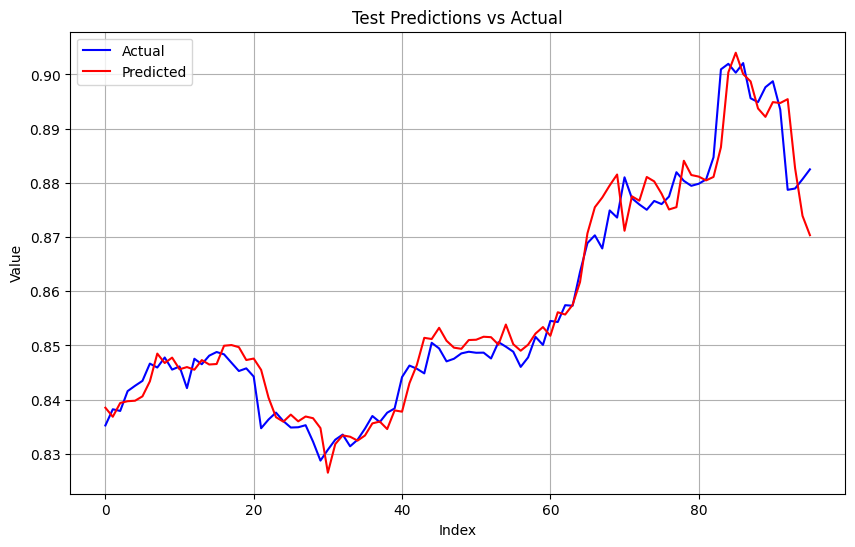

In [49]:
# First days prediction
plot_predictions(test_seq_y[:96], test_preds[:96])

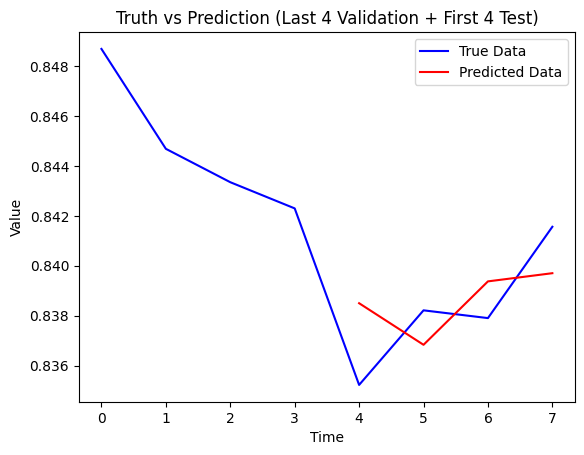

In [50]:
# Extracting the last 4 values of the validation sequence
val_last_4 = val_seq_y[-4:]

# Extracting the first 4 values of the test sequence
test_first_4 = test_seq_y[:4]

# Concatenating the last 4 values of the validation sequence with the first 4 values of the test sequence
truth_combined = np.concatenate((val_last_4, test_first_4), axis=0)

# Extracting the last 4 predicted values
pred_last_4 = test_preds[:4]

# Plotting
plt.plot(range(8), truth_combined, label='True Data', color='blue')
plt.plot(range(4, 8), pred_last_4, label='Predicted Data', color='red')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Truth vs Prediction (Last 4 Validation + First 4 Test)')
plt.legend()

# Show plot
plt.show()

<a id=3.3.2></a>
### 3.3.2 FCN

In [51]:
class FCN(tf.keras.Model):
    def __init__(self, input_shape, layers=[128, 256, 128], kss=[7, 5, 3]):
        super(FCN, self).__init__()
        assert len(layers) == len(kss)
        self.convblock1 = self.conv_block(input_shape[-1], layers[0], kss[0])
        self.convblock2 = self.conv_block(layers[0], layers[1], kss[1])
        self.convblock3 = self.conv_block(layers[1], layers[2], kss[2])
        self.gap = tf.keras.layers.GlobalAveragePooling1D()
        self.fc = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.gap(x)
        return self.fc(x)

    def conv_block(self, in_channels, filters, kernel_size):
        conv = tf.keras.layers.Conv1D(filters, kernel_size, padding='same', activation='relu')
        batchnorm = tf.keras.layers.BatchNormalization()
        return tf.keras.Sequential([conv, batchnorm])


In [52]:
# Define parameters
window_size = 12
step_size = 1
input_shape = (window_size, 10)  # Define num_features
num_classes = 1  # regression problem

# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size, step_size)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, window_size, step_size)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, window_size, step_size)

# Initialize and build the model
model = FCN(input_shape)

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, verbose=1, min_lr=1e-7)


optim = tf.keras.optimizers.Adam(learning_rate=2e-4)
# Compile the model
model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(train_seq_x, train_seq_y, validation_data=(val_seq_x, val_seq_y), epochs=100, batch_size=64,
                    callbacks=[early_stopping, lr_scheduler], verbose=1)


Epoch 1/100
487/487 [==============================] - 5s 8ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.2652 - val_mse: 0.2652 - lr: 2.0000e-04
Epoch 2/100
487/487 [==============================] - 4s 8ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0067 - val_mse: 0.0067 - lr: 2.0000e-04
Epoch 3/100
487/487 [==============================] - 4s 9ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0049 - val_mse: 0.0049 - lr: 2.0000e-04
Epoch 4/100
487/487 [==============================] - 6s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0139 - val_mse: 0.0139 - lr: 2.0000e-04
Epoch 5/100
487/487 [==============================] - 6s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0024 - val_mse: 0.0024 - lr: 2.0000e-04
Epoch 6/100
487/487 [==============================] - 6s 11ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0061 - val_mse: 0.0061 - lr: 2.0000e-04
Epoch 7/100
487/487 [==============================] - 5s 11ms/step - loss: 0.0014 - mse: 0.0014 

487/487 [==============================] - 5s 10ms/step - loss: 7.6086e-04 - mse: 7.6086e-04 - val_loss: 8.1546e-05 - val_mse: 8.1546e-05 - lr: 1.0000e-07
Epoch 46/100
487/487 [==============================] - 5s 11ms/step - loss: 7.3647e-04 - mse: 7.3647e-04 - val_loss: 8.0333e-05 - val_mse: 8.0333e-05 - lr: 1.0000e-07
Epoch 47/100
487/487 [==============================] - 5s 11ms/step - loss: 7.2424e-04 - mse: 7.2424e-04 - val_loss: 8.4158e-05 - val_mse: 8.4158e-05 - lr: 1.0000e-07
Epoch 48/100
487/487 [==============================] - 5s 11ms/step - loss: 8.5960e-04 - mse: 8.5960e-04 - val_loss: 9.0937e-05 - val_mse: 9.0937e-05 - lr: 1.0000e-07
Epoch 49/100
487/487 [==============================] - 5s 11ms/step - loss: 7.1702e-04 - mse: 7.1702e-04 - val_loss: 1.0613e-04 - val_mse: 1.0613e-04 - lr: 1.0000e-07
Epoch 50/100
487/487 [==============================] - 5s 11ms/step - loss: 7.3327e-04 - mse: 7.3327e-04 - val_loss: 8.5139e-05 - val_mse: 8.5139e-05 - lr: 1.0000e-07
Epoch

In [54]:
# Evaluate the model
test_preds = model.predict(test_seq_x)
test_loss = model.evaluate(test_seq_x, test_seq_y, verbose=0)

54/54 [==============================] - 0s 3ms/step


Evaluation Metrics of FCN Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0113
Mean Absolute Error (MAE): 0.0083
R-squared (R2) Score: 0.9669


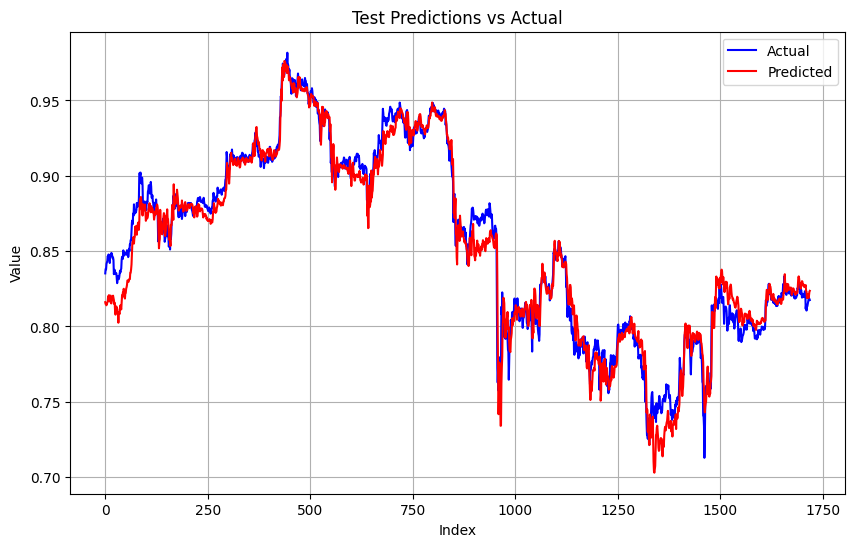

In [55]:
# Evaluation of predictions
evaluate_predictions("FCN Model", test_seq_y, test_preds)

# Plot predictions
plot_predictions(test_seq_y, test_preds)

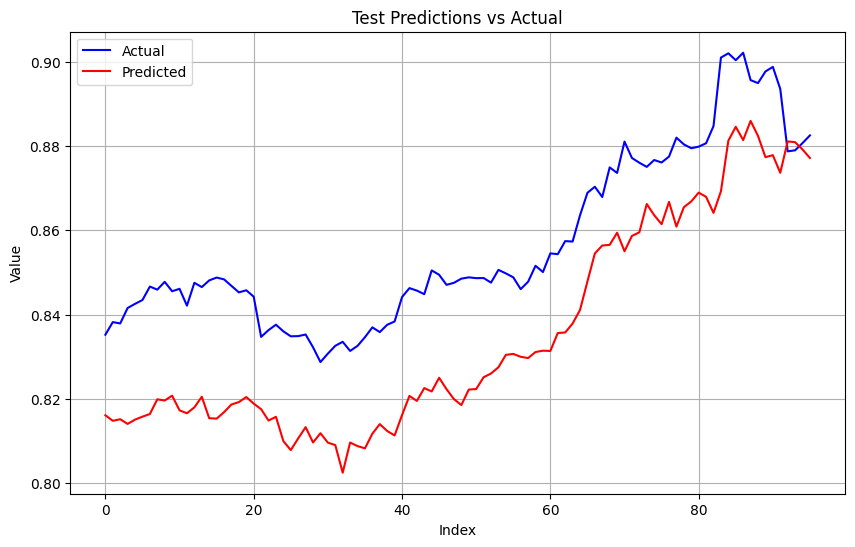

In [56]:
# First days prediction
plot_predictions(test_seq_y[:96], test_preds[:96])

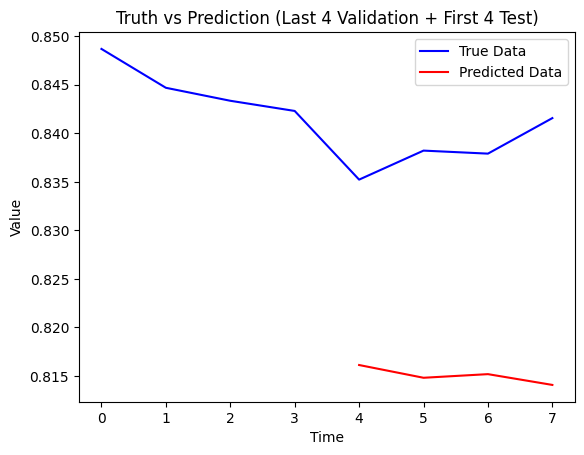

In [57]:
# Extracting the last 4 values of the validation sequence
val_last_4 = val_seq_y[-4:]

# Extracting the first 4 values of the test sequence
test_first_4 = test_seq_y[:4]

# Concatenating the last 4 values of the validation sequence with the first 4 values of the test sequence
truth_combined = np.concatenate((val_last_4, test_first_4), axis=0)

# Extracting the last 4 predicted values
pred_last_4 = test_preds[:4]

# Plotting
plt.plot(range(8), truth_combined, label='True Data', color='blue')
plt.plot(range(4, 8), pred_last_4, label='Predicted Data', color='red')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Truth vs Prediction (Last 4 Validation + First 4 Test)')
plt.legend()

# Show plot
plt.show()

<a id=3.3.4></a>
### 3.3.4 Transformer Model

In [26]:
import torch
import torch.nn as nn
import numpy as np
import time
import math
from matplotlib import pyplot

torch.manual_seed(0)
np.random.seed(0)

# This concept is also called teacher forceing. 
# The flag decides if the loss will be calculted over all 
# or just the predicted values.
calculate_loss_over_all_values = False

In [27]:
input_window = 100
output_window = 5
batch_size = 32 # batch size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
device

device(type='cuda')

In [29]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):

        return x + self.pe[:x.size(0), :]

In [30]:
class TransAm(nn.Module):
    def __init__(self,feature_size=10,num_layers=3,dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size,feature_size)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            # print('a',src.size())
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        # print('j',src.size(),self.src_mask.size())
        output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)

        output = self.decoder(output)

        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

In [34]:
import pandas as pd
from datetime import date
data_ = pd.read_excel('LD_20142.xlsx', 'Sheet1', parse_dates=["date"])

In [35]:
# if window is 100 and prediction step is 1
# in -> [0..99]
# target -> [1..100]
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    # print(L)
    np.zeros((output_window,3))
    for i in range(L-tw):
        train_seq = np.append(input_data[i:i+tw,:][:-output_window,:] , np.zeros((output_window,10)),axis=0)
        train_label = input_data[i:i+tw,:]
        # print(train_seq.shape,train_label.shape)
        #train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

def get_data():
    time        = np.arange(0, 400, 0.1)
    # amplitude   = np.sin(time) + np.sin(time*0.05) +np.sin(time*0.12) *np.random.normal(-0.2, 0.2, len(time))
    

    # series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    data = data_.loc[
        (data_["date"] >= pd.Timestamp(date(2014, 1, 1))) & (data_["date"] <= pd.Timestamp(date(2014, 2, 10)))]
    data = data.loc[:, "MT_200":  "MT_209"]
    series = data.to_numpy()
    # print('a',series.shape)
    amplitude = scaler.fit_transform(series)
    # print('b', amplitude.shape)
    # amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
    
    # print(amplitude.shape)
    sampels = 2800
    train_data = amplitude[:sampels]
    test_data = amplitude[sampels:]
    
    # print(train_data.shape,test_data.shape)
    # convert our train data into a pytorch train tensor
    # train_tensor = torch.FloatTensor(train_data).view(-1)
    # todo: add comment.. 
    # print('c',train_data.shape)
    
    train_sequence = create_inout_sequences(train_data,input_window)
    # print('a',train_sequence.size())
    train_sequence = train_sequence[:-output_window] #todo: fix hack?

    #test_data = torch.FloatTensor(test_data).view(-1) 
    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window] #todo: fix hack?

    return train_sequence.to(device),test_data.to(device),scaler

def get_batch(source, i,batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window,1)).squeeze()# 1 is feature size
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window,1)).squeeze()
    return input, target

In [67]:
train_data, val_data,scaler = get_data()
print(train_data.size())
# print(train_data.size(), val_data.size())
tr,te = get_batch(train_data, 0,batch_size)
print(tr.shape,te.shape)

torch.Size([2695, 2, 100, 10])
torch.Size([100, 32, 10]) torch.Size([100, 32, 10])


In [69]:
val_data.shape

torch.Size([1031, 2, 100, 10])

In [62]:
# Define parameters
window_size = 96
step_size = 1
input_shape = (window_size, 10)  # Define num_features
num_classes = 1  # regression problem

# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size, step_size)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, window_size, step_size)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, window_size, step_size)

In [63]:
train_seq_x.shape

(31038, 96, 10)

In [65]:
import torch
import time
import math

def train(train_data):
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)        

        if calculate_loss_over_all_values:
            loss = criterion(output, targets)
        else:
            loss = criterion(output[-output_window:], targets[-output_window:])
    
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

In [64]:
def plot(eval_model, data_source,epoch,scaler):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    with torch.no_grad():
        for i in range(0, len(data_source) - 1):
            data, target = get_batch(data_source, i,1)
            data = data.unsqueeze(1)
            target = target.unsqueeze(1)            
            # look like the model returns static values for the output window
            output = eval_model(data)    
            if calculate_loss_over_all_values:                                
                total_loss += criterion(output, target).item()
            else:
                total_loss += criterion(output[-output_window:], target[-output_window:]).item()
            
            test_result = torch.cat((test_result, output[-1,:].squeeze(1).cpu()), 0) #todo: check this. -> looks good to me
            truth = torch.cat((truth, target[-1,:].squeeze(1).cpu()), 0)
            
    #test_result = test_result.cpu().numpy()
    len(test_result)
    
    test_result_=scaler.inverse_transform(test_result[:700])
    truth_=scaler.inverse_transform(truth)
    print(test_result.shape,truth.shape)
    for m in range(9):
        test_result = test_result_[:,m]
        truth = truth_[:,m]
        fig = pyplot.figure(1, figsize=(20, 5))
        fig.patch.set_facecolor('xkcd:white')
        pyplot.plot([k + 510                 for k in range(190)],test_result[510:],color="red")
        pyplot.title('Prediction uncertainty')
        pyplot.plot(truth[:700],color="black")
        pyplot.legend(["prediction", "true"], loc="upper left")
        ymin, ymax = pyplot.ylim()
        pyplot.vlines(510, ymin, ymax, color="blue", linestyles="dashed", linewidth=2)
        pyplot.ylim(ymin, ymax)
        pyplot.xlabel("Periods")
        pyplot.ylabel("Y")
        pyplot.show()
        pyplot.close()
    return total_loss / i

In [66]:
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 1000
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i,eval_batch_size)
            output = eval_model(data) 
            print(output[-output_window:].size(),targets[-output_window:].size())
            if calculate_loss_over_all_values:
                total_loss += len(data[0])* criterion(output, targets).cpu().item()
            else:                                
                total_loss += len(data[0])* criterion(output[-output_window:], targets[-output_window:]).cpu().item()            
    return total_loss / len(data_source)

In [70]:
model = TransAm().to(device)

criterion = nn.MSELoss()
lr = 0.005 
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.98)

best_val_loss = float("inf")
epochs = 20 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_seq_x)
    
    
    if(epoch % 1 is 0):
        val_loss = plot(model, val_seq_x, epoch, scaler)
        # predict_future(model, val_data,200,epoch,scaler)
    else:
        val_loss = evaluate(model, val_seq_x)
        
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 

<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Can\AppData\Local\Temp\ipykernel_21736\1253848013.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(epoch % 1 is 0):
C:\Users\Can\AppData\Local\Temp\ipykernel_21736\1253848013.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(epoch % 1 is 0):
C:\Users\Can\AppData\Local\Temp\ipykernel_21736\1253848013.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(epoch % 1 is 0):


TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray